# MACHINE LEARNING PROJECT

## Importing necessary modules

In [191]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,roc_auc_score,confusion_matrix,accuracy_score

# DATA COLLECTION

In [85]:
#importing main data as df1
df1=pd.read_csv("C:/Users/The Computer World/jupyter resources/sydney_rain prediction.csv" , header=0)

# DATA EXPLORATION

In [86]:
#first 5 rows of main data
df1.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,2/2/2008,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,2/3/2008,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,2/4/2008,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,2/5/2008,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


In [87]:
#summary statistics
df1.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3334.000000,3335.000000,3331.000000,3286.000000,3321.000000,3323.000000,3324.000000,3317.000000,3318.000000,2771.000000,2776.000000,3333.000000,3333.000000
mean,14.865057,23.002339,3.330231,5.187432,7.179374,68.229010,54.699158,1018.346156,1016.018774,4.181523,4.218660,17.819742,21.533333
std,4.553641,4.494638,9.895172,2.777407,3.810886,15.085355,16.293530,7.021571,7.032211,2.749578,2.641885,4.897177,4.303737
min,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000
25%,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.700000,1011.300000,1.000000,1.000000,13.800000,18.400000
50%,14.900000,22.800000,0.000000,4.800000,8.300000,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000,18.200000,21.300000
75%,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,65.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000
max,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000


In [88]:
#data types and missing values
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3337 non-null   object 
 1   Location      3337 non-null   object 
 2   MinTemp       3334 non-null   float64
 3   MaxTemp       3335 non-null   float64
 4   Rainfall      3331 non-null   float64
 5   Evaporation   3286 non-null   float64
 6   Sunshine      3321 non-null   float64
 7   Humidity9am   3323 non-null   float64
 8   Humidity3pm   3324 non-null   float64
 9   Pressure9am   3317 non-null   float64
 10  Pressure3pm   3318 non-null   float64
 11  Cloud9am      2771 non-null   float64
 12  Cloud3pm      2776 non-null   float64
 13  Temp9am       3333 non-null   float64
 14  Temp3pm       3333 non-null   float64
 15  RainToday     3331 non-null   object 
 16  RainTomorrow  3337 non-null   object 
dtypes: float64(13), object(4)
memory usage: 443.3+ KB


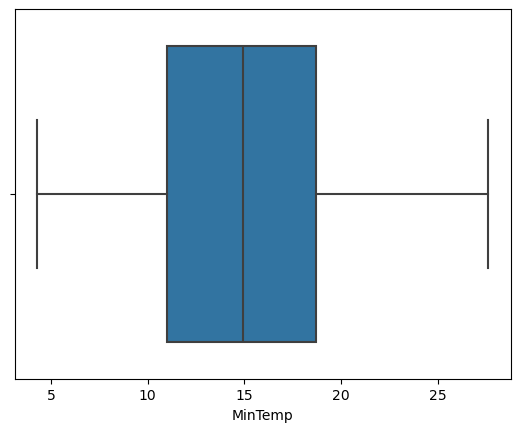

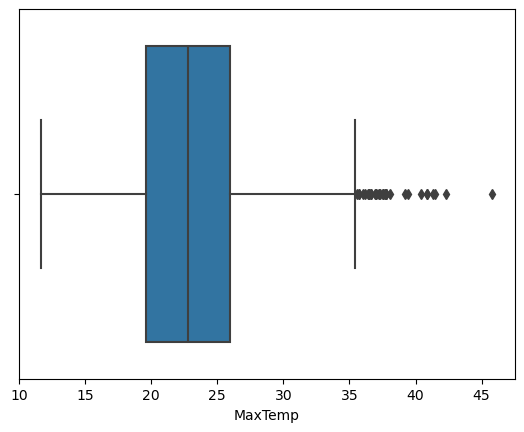

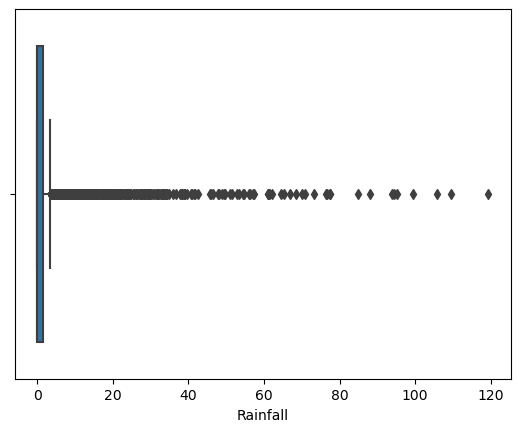

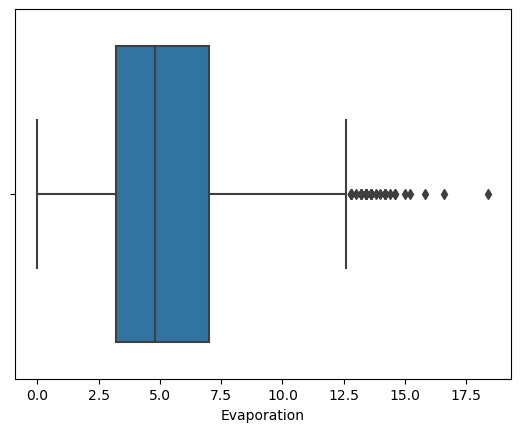

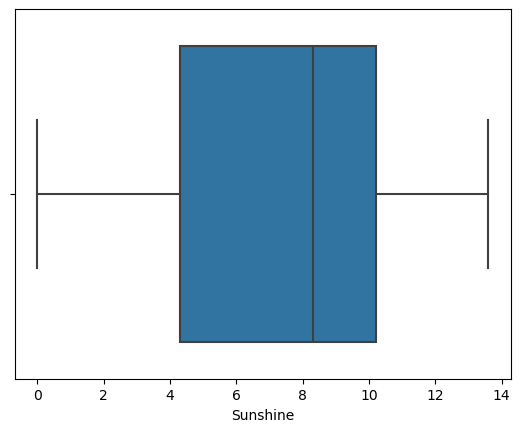

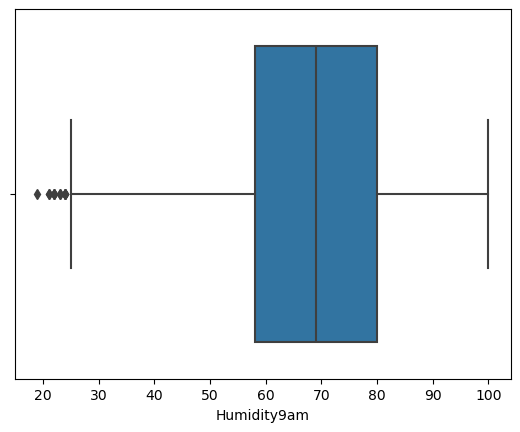

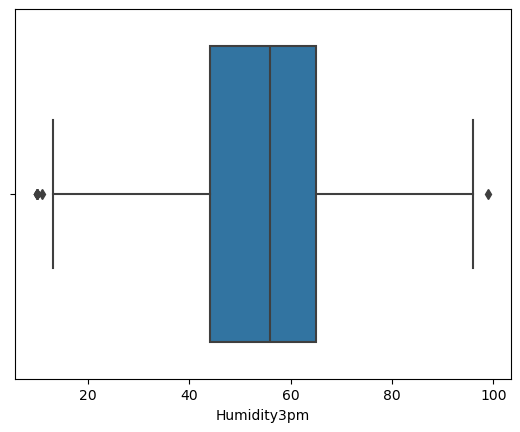

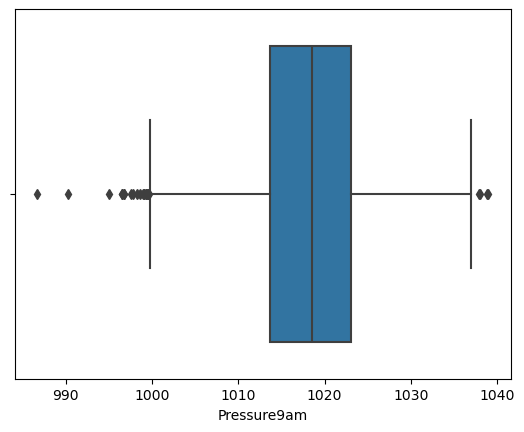

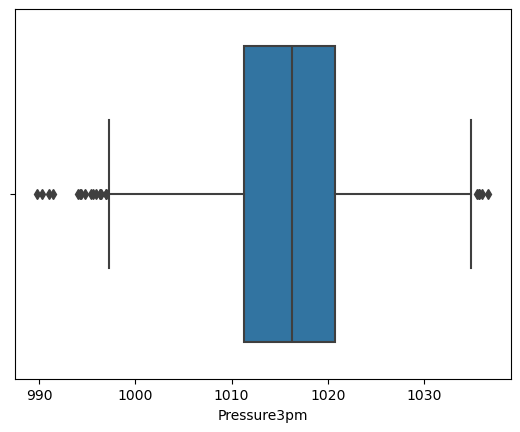

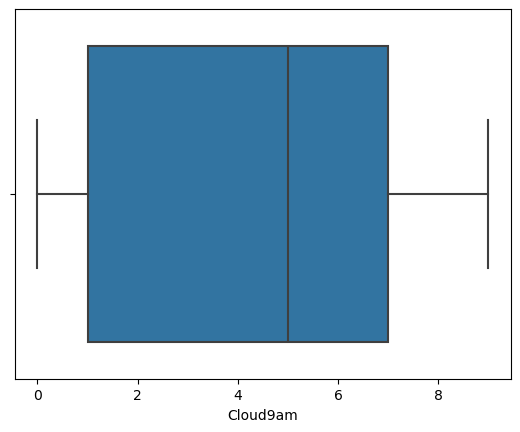

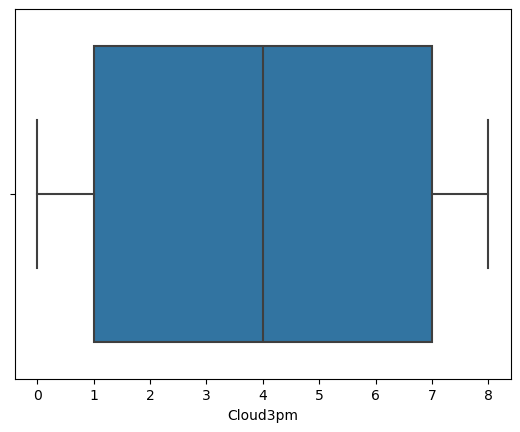

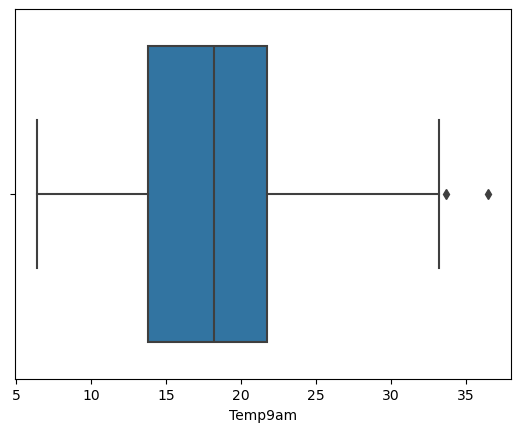

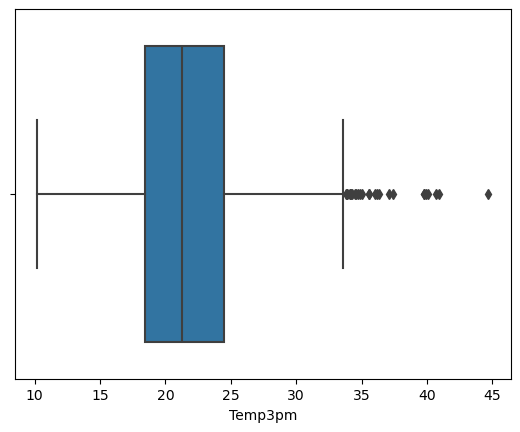

In [89]:
# creating box plots for each numeric column to check for outliers
for col in df1.select_dtypes(include=np.number).columns:
    sns.boxplot(x=df1[col])
    plt.show()

### Plotting distplot of those column which shows outliers to check skewness 

C:\Users\The Computer World\AppData\Local\Temp\ipykernel_11188\4101308749.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['MaxTemp'])
C:\Users\The Computer World\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

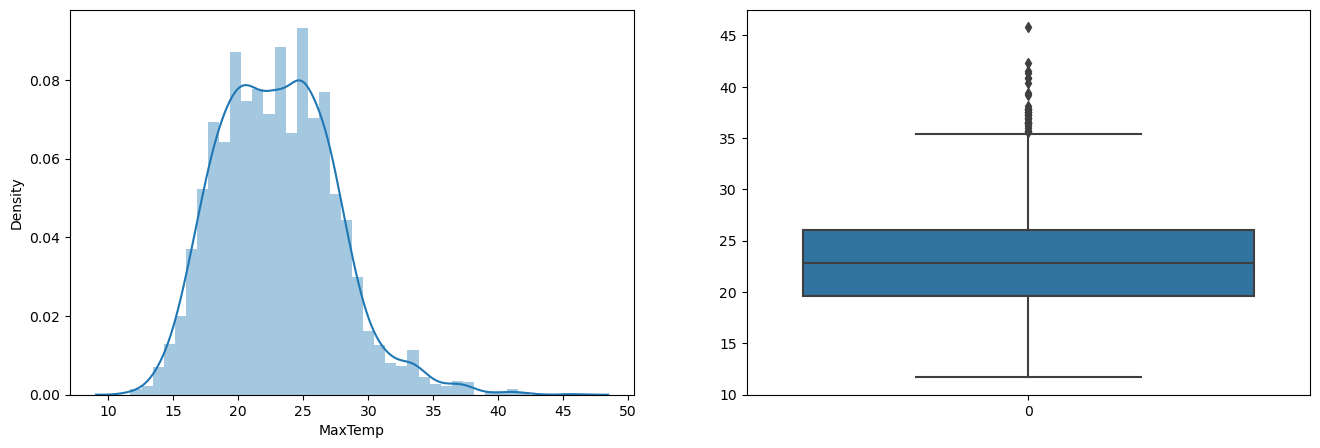

In [90]:
# For column MaxTemp
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df1['MaxTemp'])

plt.subplot(1,2,2)
sns.boxplot(df1['MaxTemp'])


In [91]:
skewness = df1['MaxTemp'].skew()
print(f"The skewness of the column is: {skewness}")


The skewness of the column is: 0.5086228862742713


C:\Users\The Computer World\AppData\Local\Temp\ipykernel_11188\3104299644.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Rainfall'])
C:\Users\The Computer World\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

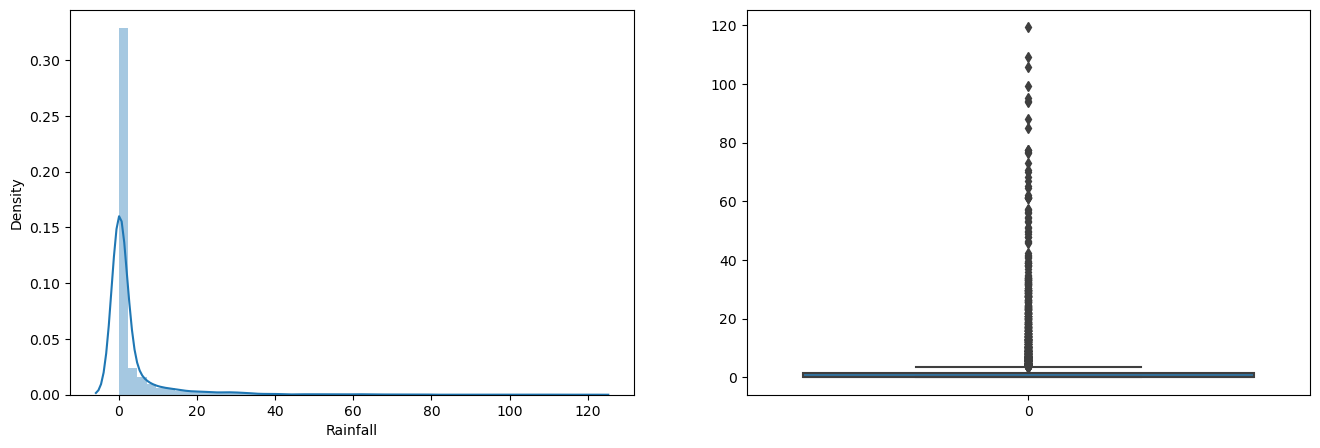

In [92]:
# For column Rainfall
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df1['Rainfall'])

plt.subplot(1,2,2)
sns.boxplot(df1['Rainfall'])

In [93]:
skewness = df1['Rainfall'].skew()
print(f"The skewness of the column is: {skewness}")

The skewness of the column is: 5.366321058455834


C:\Users\The Computer World\AppData\Local\Temp\ipykernel_11188\3180568426.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Evaporation'])
C:\Users\The Computer World\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

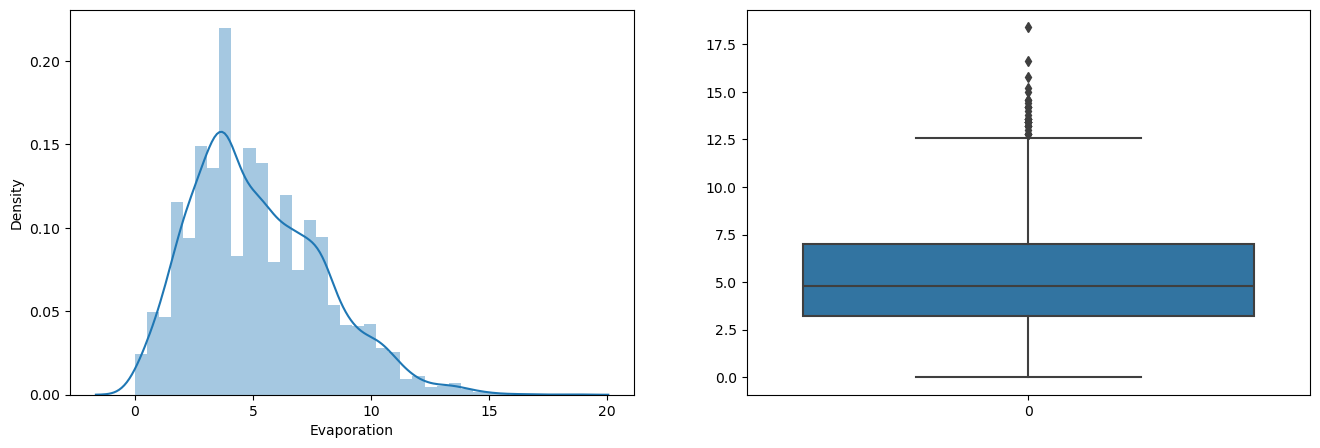

In [94]:
# For column Evaporation
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df1['Evaporation'])

plt.subplot(1,2,2)
sns.boxplot(df1['Evaporation'])

In [95]:
skewness = df1['Evaporation'].skew()
print(f"The skewness of the column is: {skewness}")

The skewness of the column is: 0.6505271051990558


C:\Users\The Computer World\AppData\Local\Temp\ipykernel_11188\2750256588.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Humidity9am'])
C:\Users\The Computer World\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

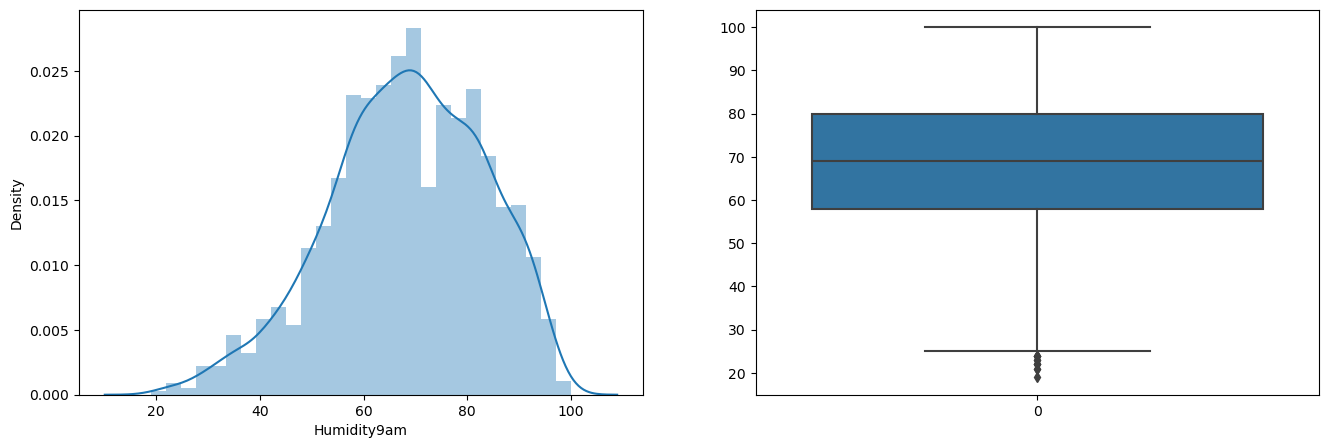

In [96]:
# For column Humidity9am
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df1['Humidity9am'])

plt.subplot(1,2,2)
sns.boxplot(df1['Humidity9am'])

In [97]:
skewness = df1['Humidity9am'].skew()
print(f"The skewness of the column is: {skewness}")

The skewness of the column is: -0.3508178429632302


C:\Users\The Computer World\AppData\Local\Temp\ipykernel_11188\3187108467.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Humidity3pm'])
C:\Users\The Computer World\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

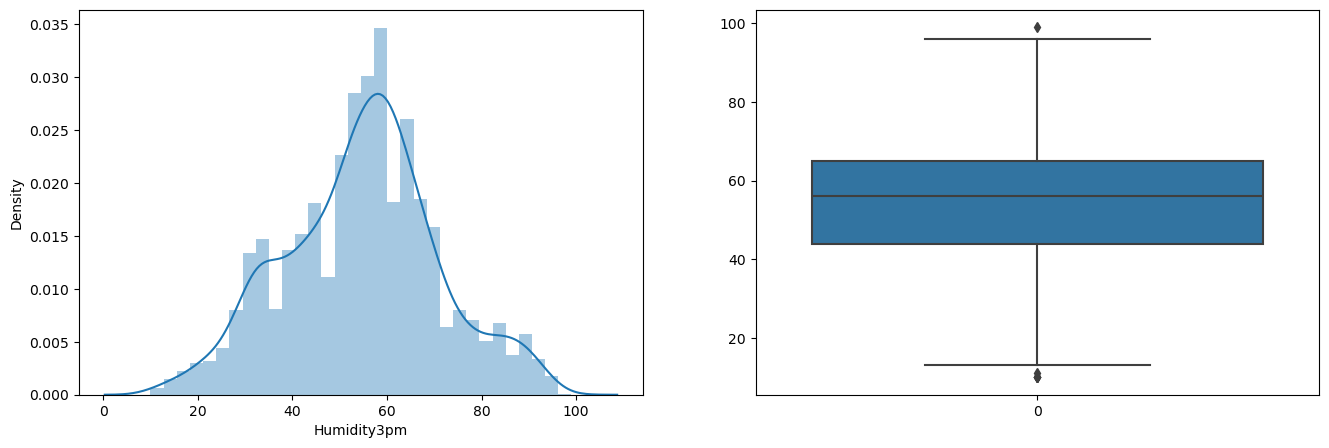

In [98]:
# For column Humidity3pm
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df1['Humidity3pm'])

plt.subplot(1,2,2)
sns.boxplot(df1['Humidity3pm'])

In [99]:
skewness = df1['Humidity3pm'].skew()
print(f"The skewness of the column is: {skewness}")

The skewness of the column is: -0.016014826237040217


C:\Users\The Computer World\AppData\Local\Temp\ipykernel_11188\3621157184.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Pressure9am'])
C:\Users\The Computer World\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

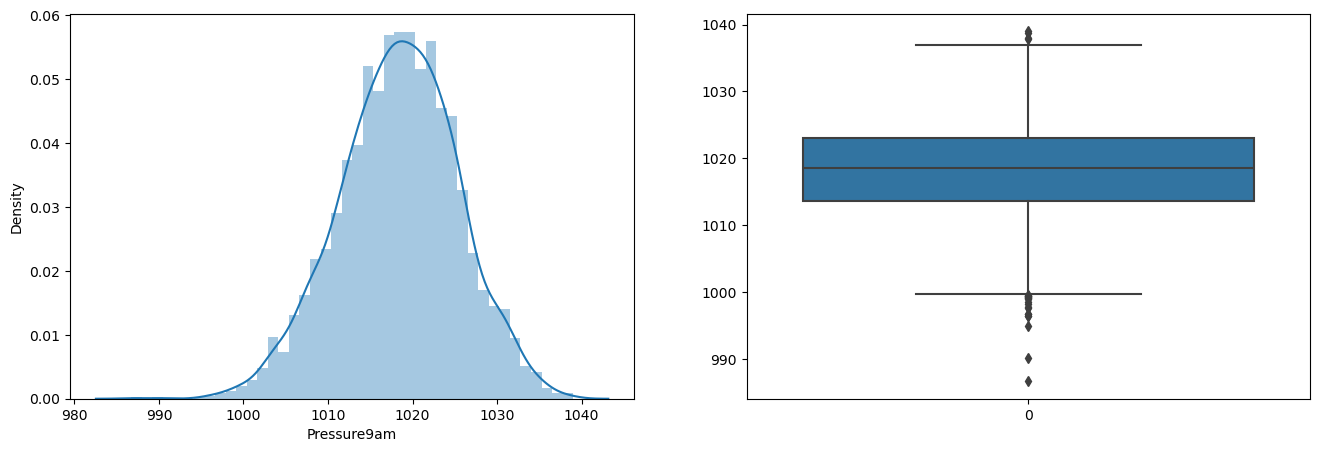

In [100]:
# For column Pressure9am
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df1['Pressure9am'])

plt.subplot(1,2,2)
sns.boxplot(df1['Pressure9am'])

In [101]:
skewness = df1['Pressure9am'].skew()
print(f"The skewness of the column is: {skewness}")

The skewness of the column is: -0.17564112065109075


C:\Users\The Computer World\AppData\Local\Temp\ipykernel_11188\3651508287.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Pressure3pm'])
C:\Users\The Computer World\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

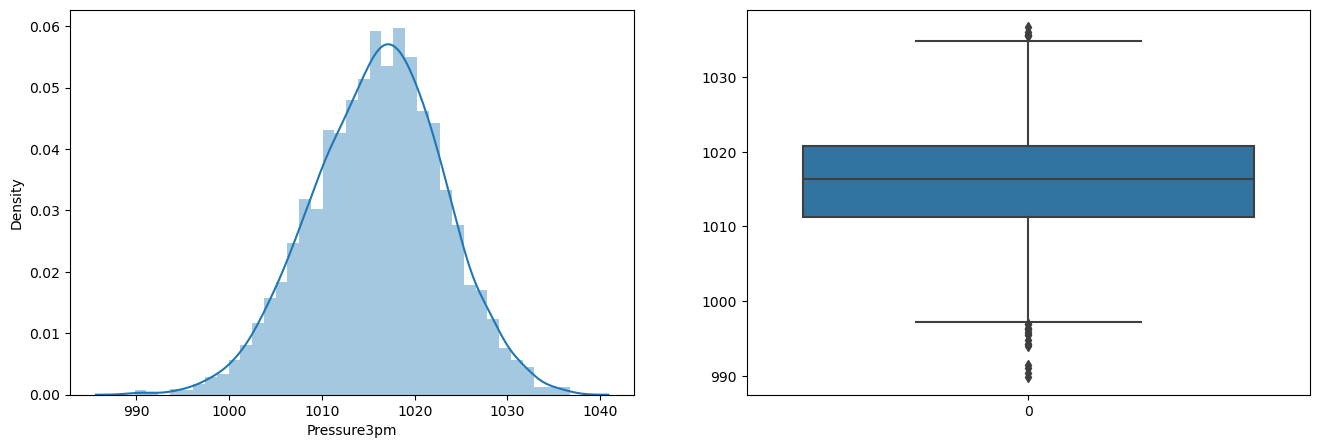

In [102]:
# For column Pressure3pm
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df1['Pressure3pm'])

plt.subplot(1,2,2)
sns.boxplot(df1['Pressure3pm'])

In [103]:
skewness = df1['Pressure3pm'].skew()
print(f"The skewness of the column is: {skewness}")

The skewness of the column is: -0.16718060237820537


C:\Users\The Computer World\AppData\Local\Temp\ipykernel_11188\3098218542.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Temp9am'])
C:\Users\The Computer World\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

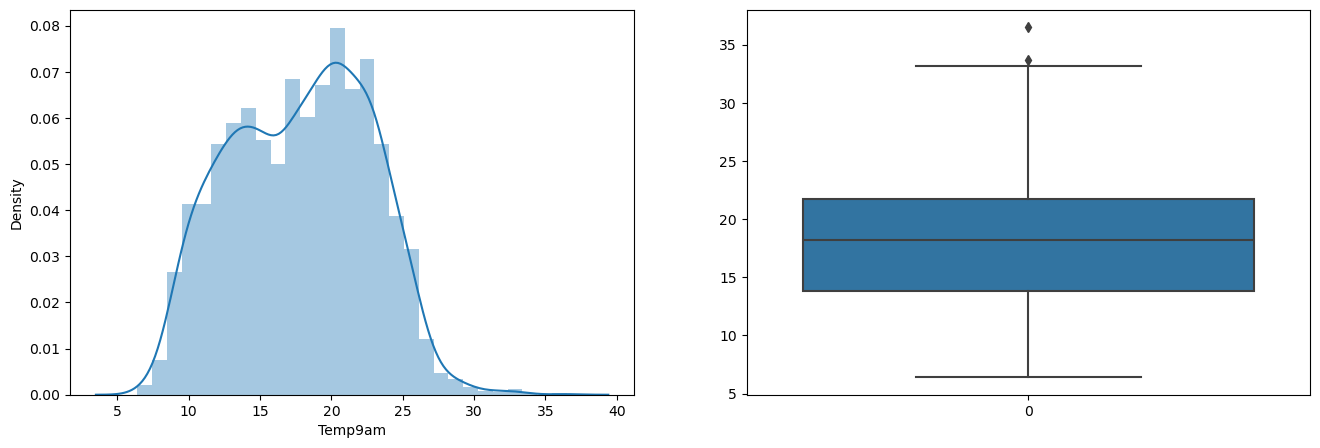

In [104]:
# For column Temp9am
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df1['Temp9am'])

plt.subplot(1,2,2)
sns.boxplot(df1['Temp9am'])

In [105]:
skewness = df1['Temp9am'].skew()
print(f"The skewness of the column is: {skewness}")

The skewness of the column is: -0.007458989137728642


C:\Users\The Computer World\AppData\Local\Temp\ipykernel_11188\1361870058.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Temp3pm'])
C:\Users\The Computer World\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

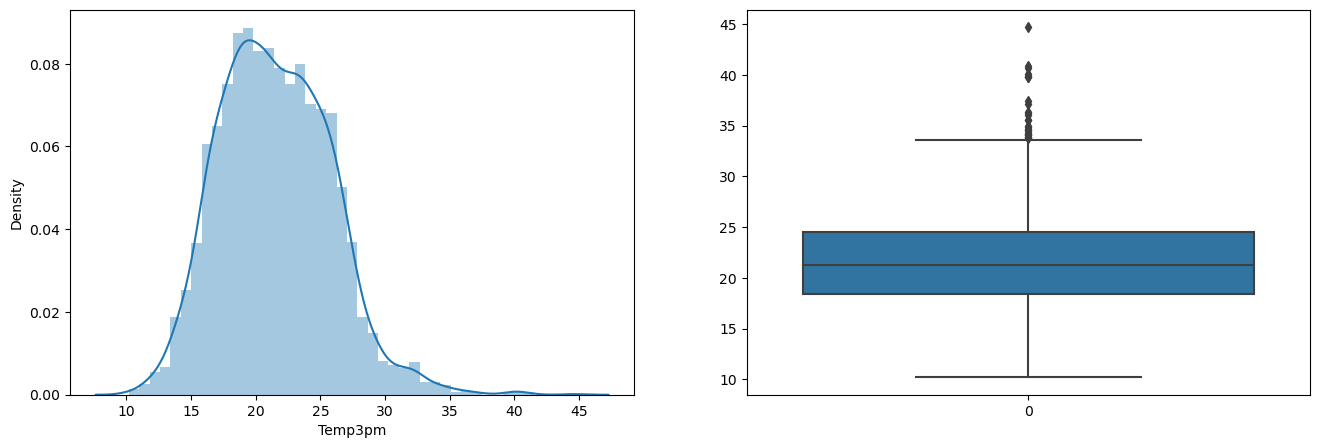

In [106]:
# For column Temp3pm
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df1['Temp3pm'])

plt.subplot(1,2,2)
sns.boxplot(df1['Temp3pm'])

In [107]:
skewness = df1['Temp3pm'].skew()
print(f"The skewness of the column is: {skewness}")

The skewness of the column is: 0.46225179122641263


### INFERENCES AFTER DATA EXPLORATION
#### 1.Missing values are present in 14 columns total
#### 2.Boxplot of numeric feature shows ouliers in many columns 
#### 3.Distplot of MaxTemp shows POSITIVE SKEWED DISTRIBUTION.
#### 4.Distplot of Rainfall shows POSITIVE SKEWED DISTRIBUTION.
#### 5.Distplot of Evaporation shows POSITIVE SKEWED DISTRIBUTION.
#### 6.Distplot of Humidity9pm shows NEGATIVE SKEWED DISTRIBUTION.
#### 7.Distplot of Humidity3am shows NEGATIVE SKEWED DISTRIBUTION.
#### 8.Distplot of Pressure9pm shows NEGATIVE SKEWED DISTRIBUTION.
#### 9.Distplot of Pressure3am shows NEGATIVE SKEWED DISTRIBUTION.
#### 10.Distplot of Temp9pm shows NEGATIVE SKEWED DISTRIBUTION.
#### 11.Distplot of Temp3am shows POSITIVE SKEWED DISTRIBUTION.
#### POSITIVE SKEWED DISTRIBUTION MEANS RIGHT SKEWED AND NEAGTIVE MEAND LEFT SKEWED.

## DATA PREPROCESSING

### Treating missing values

In [108]:
# Selecting only numeric columns
num_cols = df1.select_dtypes(include='number').columns

# Replacing null values with mean for numeric columns
df1[num_cols] = df1[num_cols].fillna(df1[num_cols].mean())

# Filling null values in "RainToday" with the mode
df1['RainToday'].fillna(df1['RainToday'].mode()[0], inplace=True)

In [109]:
# checking for any missing values after treatment
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3337 non-null   object 
 1   Location      3337 non-null   object 
 2   MinTemp       3337 non-null   float64
 3   MaxTemp       3337 non-null   float64
 4   Rainfall      3337 non-null   float64
 5   Evaporation   3337 non-null   float64
 6   Sunshine      3337 non-null   float64
 7   Humidity9am   3337 non-null   float64
 8   Humidity3pm   3337 non-null   float64
 9   Pressure9am   3337 non-null   float64
 10  Pressure3pm   3337 non-null   float64
 11  Cloud9am      3337 non-null   float64
 12  Cloud3pm      3337 non-null   float64
 13  Temp9am       3337 non-null   float64
 14  Temp3pm       3337 non-null   float64
 15  RainToday     3337 non-null   object 
 16  RainTomorrow  3337 non-null   object 
dtypes: float64(13), object(4)
memory usage: 443.3+ KB


### Missing values treated for all columns.

### Outlier treatment

#### For MaxTemp column treating outliers using 99th percentile

In [141]:
# calculating 99th and 1st percentile 
upper_limit = df1['MaxTemp'].quantile(0.99)
lower_limit= df1['MaxTemp'].quantile(0.01)
print("Upper limit ", upper_limit)
print("Lower limit ", lower_limit)

Upper limit  35.52799999999998
Lower limit  14.4


In [142]:
''' Capping i.e. values which are greater than or equal to upper limit are replaced with upper limit and values with are less than or 
equal to lower limit are replaced with lower limit and this changes takes place in copy of main dataframe(df1) that is df
'''
df=df1.copy()
df['MaxTemp'] = np.where (df['MaxTemp'] >= upper_limit,
                               upper_limit,
                               np.where(df['MaxTemp'] <= lower_limit,
                               lower_limit,
                               df['MaxTemp']))

C:\Users\The Computer World\AppData\Local\Temp\ipykernel_11188\2315012593.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MaxTemp'])
C:\Users\The Computer World\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

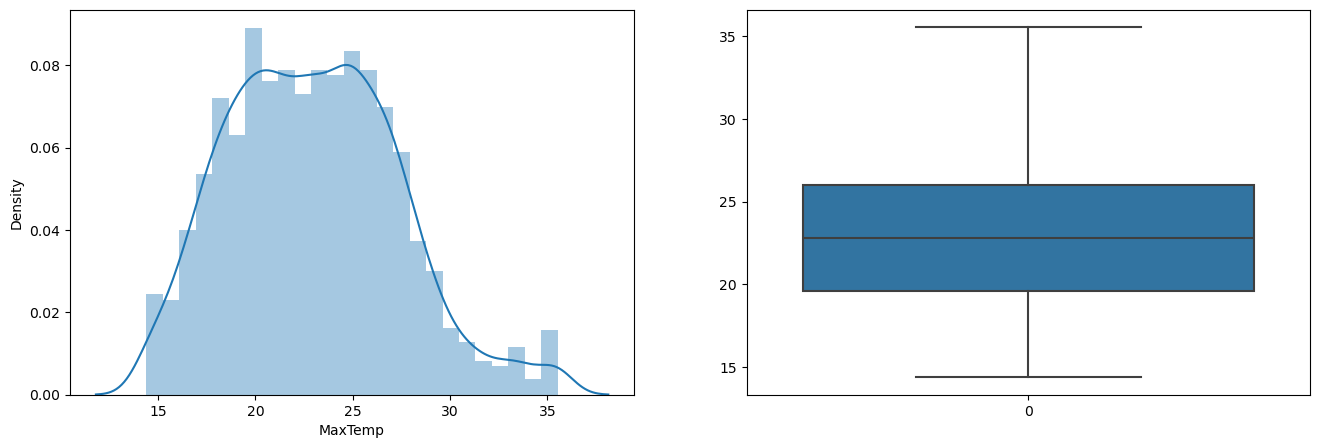

In [143]:
#plotting distplot and boxplot for checking outliers after outlier treatment
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['MaxTemp'])

plt.subplot(1,2,2)
sns.boxplot(df['MaxTemp'])

### Outliers treated for MaxTemp column

### For Rainfall column treating outliers using Interquartile range

In [146]:
# Calculating 25th and 75th Percentile for Rainfall column
Q1 = df1['Rainfall'].quantile(0.25)
Q3 = df1['Rainfall'].quantile(0.75)
IQR = Q3 - Q1

# Defining bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering out outliers
df = df1[(df1['Rainfall'] >= lower_bound) & (df1['Rainfall'] <= upper_bound)]

### Outliers treated for Rainfall column

### For Evaporation column,calculting 99th and 1st percentile

In [147]:
# calculating 99th and 1st percentile 
upper_limit = df1['Evaporation'].quantile(0.99)
lower_limit = df1['Evaporation'].quantile(0.01)
print("Upper limit ", upper_limit)
print("Lower limit ", lower_limit)

Upper limit  12.8
Lower limit  0.4


In [148]:
''' Capping i.e. values which are greater than or equal to upper limit are replaced with upper limit and values with are less than or 
equal to lower limit are replaced with lower limit and this changes takes place in copy of main dataframe(df1) that is df
'''
df=df1.copy()
df['Evaporation'] = np.where (df['Evaporation'] >= upper_limit,
                               upper_limit,
                               np.where(df['Evaporation'] <= lower_limit,
                               lower_limit,
                               df['Evaporation']))

C:\Users\The Computer World\AppData\Local\Temp\ipykernel_11188\1173569759.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Evaporation'])
C:\Users\The Computer World\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

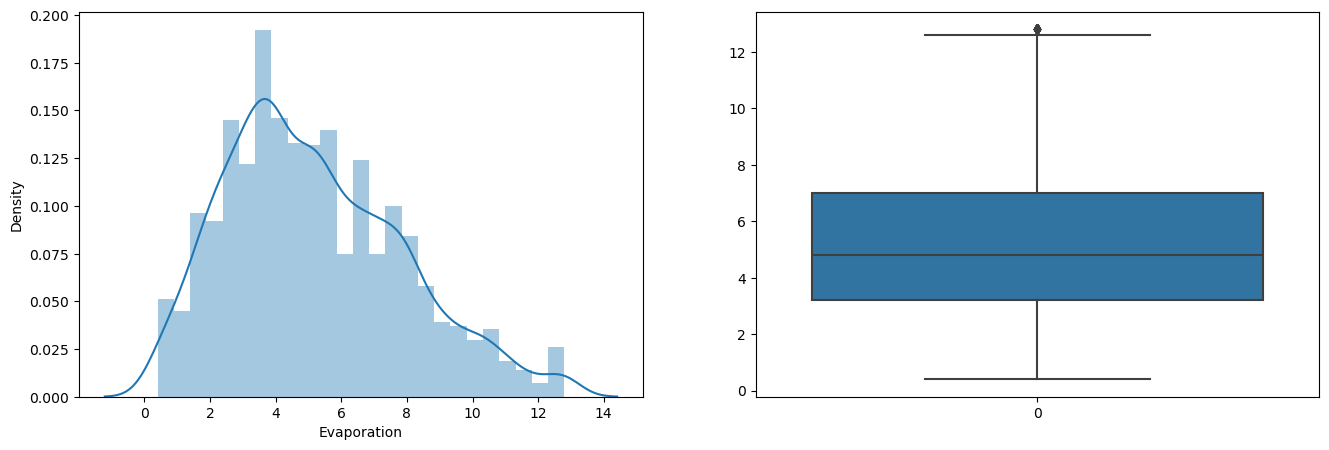

In [149]:
#plotting distplot and boxplot for checking outliers after outlier treatment
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Evaporation'])

plt.subplot(1,2,2)
sns.boxplot(df['Evaporation'])

### Outliers treated for Evaporation column

### For Humidity9am column calculating 99th and 1st percentile

In [150]:
# calculating 99th and 1st percentile 
upper_limit = df1['Humidity9am'].quantile(0.99)
lower_limit = df1['Humidity9am'].quantile(0.01)
print("Upper limit ", upper_limit)
print("Lower limit ", lower_limit)

Upper limit  96.0
Lower limit  30.0


In [151]:
''' Capping i.e. values which are greater than or equal to upper limit are replaced with upper limit and values with are less than or 
equal to lower limit are replaced with lower limit and this changes takes place in copy of main dataframe(df1) that is df
'''
df=df1.copy()
df['Humidity9am'] = np.where (df['Humidity9am'] >= upper_limit,
                               upper_limit,
                               np.where(df['Humidity9am'] <= lower_limit,
                               lower_limit,
                               df['Humidity9am']))

C:\Users\The Computer World\AppData\Local\Temp\ipykernel_11188\3630555217.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Humidity9am'])
C:\Users\The Computer World\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

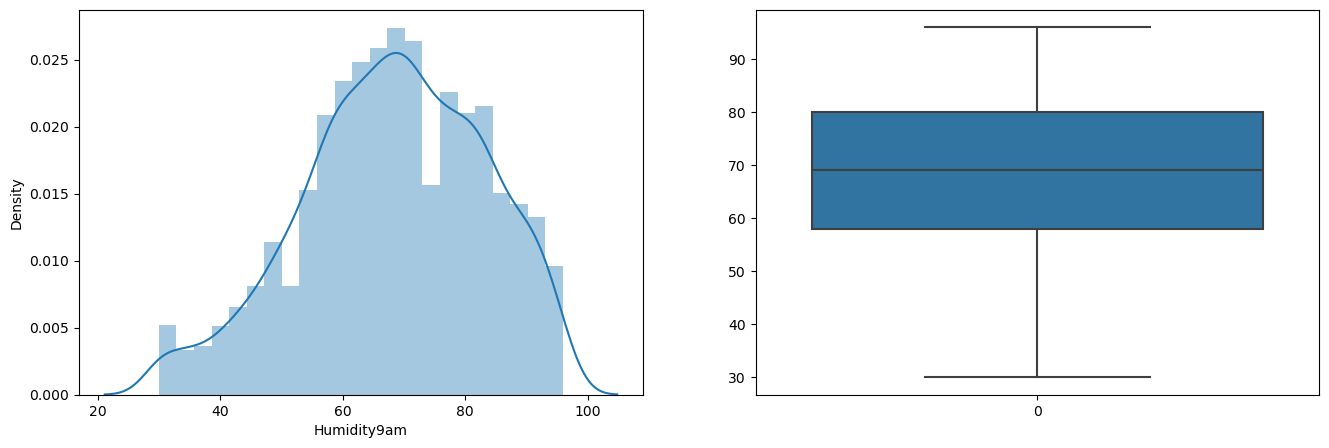

In [152]:
#plotting distplot and boxplot for checking outliers after outlier treatment
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Humidity9am'])

plt.subplot(1,2,2)
sns.boxplot(df['Humidity9am'])

### Outliers treated for Humidity9am column

### For Humidity3pm column calculating 99th and 1st percentile

In [153]:
# calculating 99th and 1st percentile 
upper_limit = df1['Humidity3pm'].quantile(0.99)
lower_limit = df1['Humidity3pm'].quantile(0.01)
print("Upper limit ", upper_limit)
print("Lower limit ", lower_limit)

Upper limit  92.0
Lower limit  18.0


In [154]:
''' Capping i.e. values which are greater than or equal to upper limit are replaced with upper limit and values with are less than or 
equal to lower limit are replaced with lower limit and this changes takes place in copy of main dataframe(df1) that is df
'''
df=df1.copy()
df['Humidity3pm'] = np.where (df['Humidity3pm'] >= upper_limit,
                               upper_limit,
                               np.where(df['Humidity3pm'] <= lower_limit,
                               lower_limit,
                               df['Humidity3pm']))

C:\Users\The Computer World\AppData\Local\Temp\ipykernel_11188\2541095617.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Humidity3pm'])
C:\Users\The Computer World\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

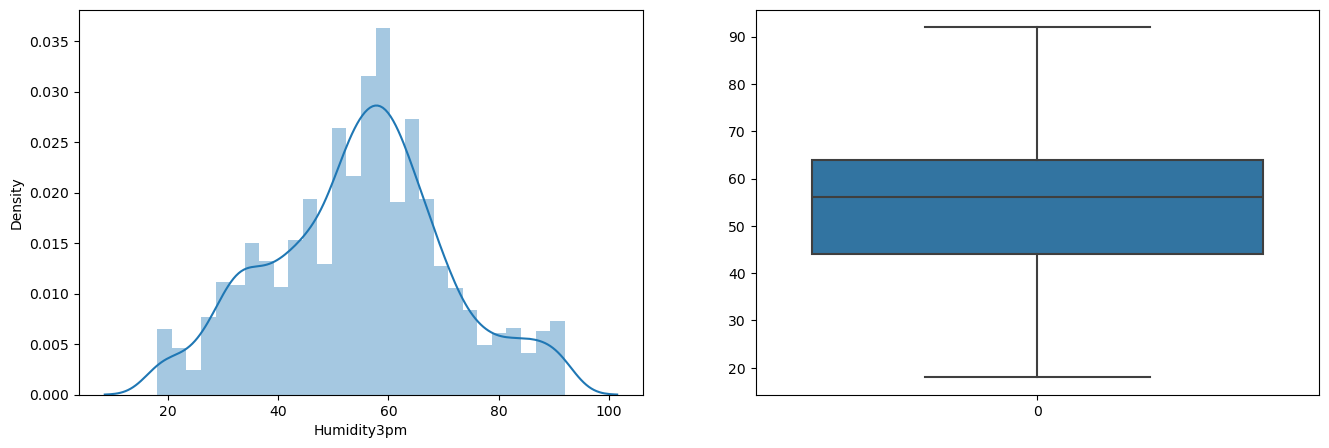

In [155]:
#plotting distplot and boxplot for checking outliers after outlier treatment
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Humidity3pm'])

plt.subplot(1,2,2)
sns.boxplot(df['Humidity3pm'])

### Outliers treated for Humidity3pm column

### For Pressure9am column calculating 99th and 1st percentile

In [156]:
# calculating 99th and 1st percentile 
upper_limit = df1['Pressure9am'].quantile(0.99)
lower_limit = df1['Pressure9am'].quantile(0.01)
print("Upper limit ", upper_limit)
print("Lower limit ", lower_limit)

Upper limit  1033.856
Lower limit  1001.572


In [157]:
''' Capping i.e. values which are greater than or equal to upper limit are replaced with upper limit and values with are less than or 
equal to lower limit are replaced with lower limit and this changes takes place in copy of main dataframe(df1) that is df
'''
df=df1.copy()
df['Pressure9am'] = np.where (df['Pressure9am'] >= upper_limit,
                               upper_limit,
                               np.where(df['Pressure9am'] <= lower_limit,
                               lower_limit,
                               df['Pressure9am']))

C:\Users\The Computer World\AppData\Local\Temp\ipykernel_11188\485706955.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Pressure9am'])
C:\Users\The Computer World\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

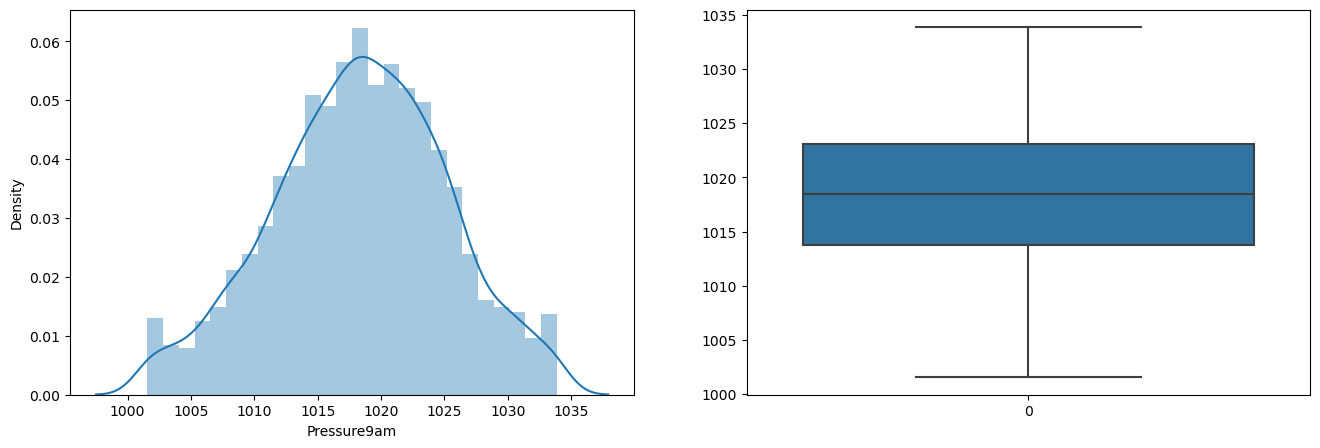

In [158]:
#plotting distplot and boxplot for checking outliers after outlier treatment
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Pressure9am'])

plt.subplot(1,2,2)
sns.boxplot(df['Pressure9am'])

### Outliers treated for Pressure9am column

### For Pressure3pm column calculating 99th and 1st percentile

In [159]:
# calculating 99th and 1st percentile 
upper_limit = df1['Pressure3pm'].quantile(0.99)
lower_limit = df1['Pressure3pm'].quantile(0.01)
print("Upper limit ", upper_limit)
print("Lower limit ", lower_limit)

Upper limit  1031.664
Lower limit  998.972


In [160]:
''' Capping i.e. values which are greater than or equal to upper limit are replaced with upper limit and values with are less than or 
equal to lower limit are replaced with lower limit and this changes takes place in copy of main dataframe(df1) that is df
'''
df=df1.copy()
df['Pressure3pm'] = np.where (df['Pressure3pm'] >= upper_limit,
                               upper_limit,
                               np.where(df['Pressure3pm'] <= lower_limit,
                               lower_limit,
                               df['Pressure3pm']))

C:\Users\The Computer World\AppData\Local\Temp\ipykernel_11188\1977161780.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Pressure3pm'])
C:\Users\The Computer World\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

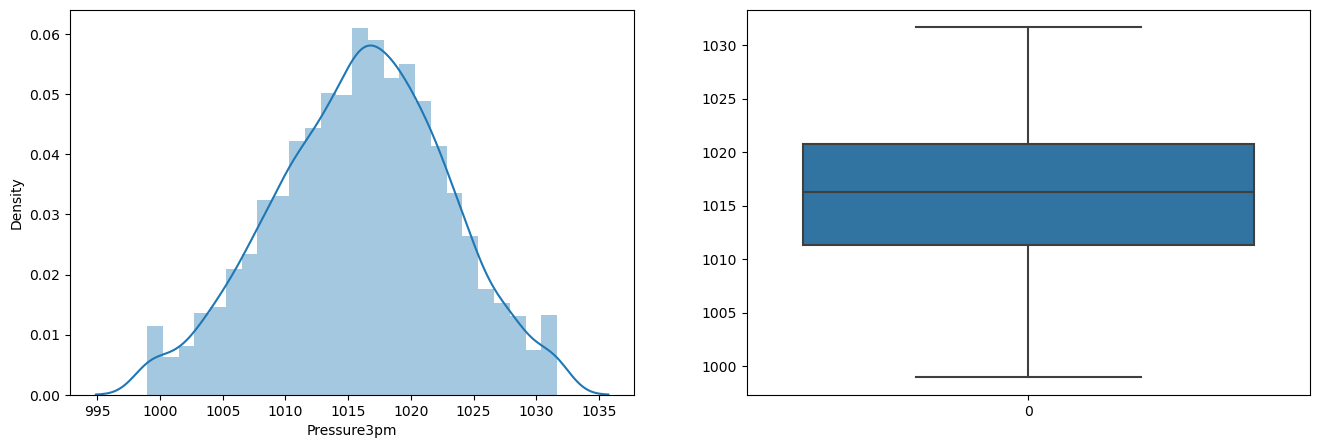

In [161]:
#plotting distplot and boxplot for checking outliers after outlier treatment
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Pressure3pm'])

plt.subplot(1,2,2)
sns.boxplot(df['Pressure3pm'])

### Outliers treated for Pressure3pm

### For Temp9am column calculating 99th and 1st percentile

In [162]:
# calculating 99th and 1st percentile 
upper_limit = df1['Temp9am'].quantile(0.99)
lower_limit = df1['Temp9am'].quantile(0.01)
print("Upper limit ", upper_limit)
print("Lower limit ", lower_limit)

Upper limit  27.863999999999987
Lower limit  8.5


In [163]:
''' Capping i.e. values which are greater than or equal to upper limit are replaced with upper limit and values with are less than or 
equal to lower limit are replaced with lower limit and this changes takes place in copy of main dataframe(df1) that is df
'''
df=df1.copy()
df['Temp9am'] = np.where (df['Temp9am'] >= upper_limit,
                               upper_limit,
                               np.where(df['Temp9am'] <= lower_limit,
                               lower_limit,
                               df['Temp9am']))

C:\Users\The Computer World\AppData\Local\Temp\ipykernel_11188\2240722708.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Temp9am'])
C:\Users\The Computer World\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

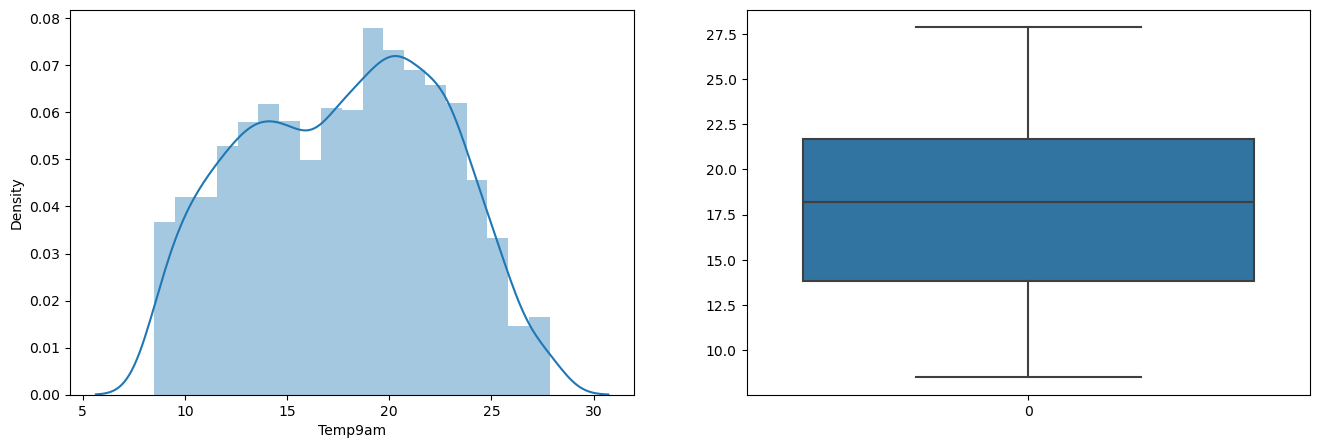

In [164]:
#plotting distplot and boxplot for checking outliers after outlier treatment
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Temp9am'])

plt.subplot(1,2,2)
sns.boxplot(df['Temp9am'])

### Outliers treated for Temp9am column

### For Temp3pm column calculating 99th and 1st percentile

In [165]:
# calculating 99th and 1st percentile 
upper_limit = df1['Temp3pm'].quantile(0.99)
lower_limit = df1['Temp3pm'].quantile(0.01)
print("Upper limit ", upper_limit)
print("Lower limit ", lower_limit)

Upper limit  32.76399999999999
Lower limit  13.1


In [166]:
''' Capping i.e. values which are greater than or equal to upper limit are replaced with upper limit and values with are less than or 
equal to lower limit are replaced with lower limit and this changes takes place in copy of main dataframe(df1) that is df
'''
df=df1.copy()
df['Temp3pm'] = np.where (df['Temp3pm'] >= upper_limit,
                               upper_limit,
                               np.where(df['Temp3pm'] <= lower_limit,
                               lower_limit,
                               df['Temp3pm']))

C:\Users\The Computer World\AppData\Local\Temp\ipykernel_11188\2994353274.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Temp3pm'])
C:\Users\The Computer World\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

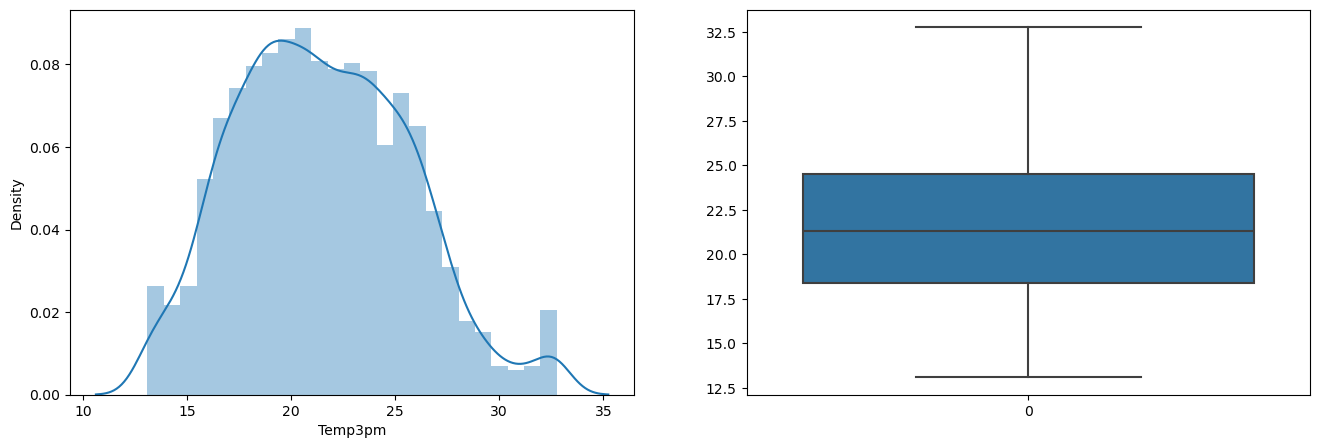

In [167]:
#plotting distplot and boxplot for checking outliers after outlier treatment
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Temp3pm'])

plt.subplot(1,2,2)
sns.boxplot(df['Temp3pm'])

### Outliers treated for Temp3pm column
### Outliers treated fo all columns

### Creating Dummy Variables for categorical values

In [168]:
#Dummy Variable 
df = pd.get_dummies(df, columns = ["RainToday", "RainTomorrow"], drop_first = True)

In [169]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
0,2/1/2008,Sydney,19.5,22.4,15.6,6.200000,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,True,True
1,2/2/2008,Sydney,19.5,25.6,6.0,3.400000,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,True,True
2,2/3/2008,Sydney,21.6,24.5,6.6,2.400000,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,True,True
3,2/4/2008,Sydney,20.2,22.8,18.8,2.200000,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,True,True
4,2/5/2008,Sydney,19.7,25.7,77.4,5.187432,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,True,True


In [177]:
# converting non-numerical column to numerical using label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df['Date']=label_encoder.fit_transform(df['Date'])
df['Location']=label_encoder.fit_transform(df['Location'])

### Correlation matrix

In [179]:
corr = df.corr()
corr

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
Date,1.000000,NaN,-0.686199,-0.553347,-0.000791,-0.495059,-0.034680,-0.010937,-0.176964,0.263885,0.225894,-0.149500,-0.088464,-0.662706,-0.552141,-0.018214,-0.026129
Location,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MinTemp,-0.686199,NaN,1.000000,0.770701,0.012866,0.567623,-0.062959,0.052362,0.270944,-0.393024,-0.355764,0.236288,0.163519,0.938814,0.760261,0.018690,0.079962
MaxTemp,-0.553347,NaN,0.770701,1.000000,-0.139837,0.509060,0.325107,-0.186875,-0.152310,-0.388533,-0.424653,-0.087381,-0.099167,0.858986,0.956508,-0.188334,-0.149269
Rainfall,-0.000791,NaN,0.012866,-0.139837,1.000000,-0.100468,-0.306119,0.330469,0.301337,-0.036988,0.003210,0.242049,0.200732,-0.055974,-0.142814,0.555015,0.293808
Evaporation,-0.495059,NaN,0.567623,0.509060,-0.100468,1.000000,0.174467,-0.394166,-0.101849,-0.345700,-0.300285,-0.037598,-0.037739,0.605348,0.475586,-0.228791,-0.064301
Sunshine,-0.034680,NaN,-0.062959,0.325107,-0.306119,0.174467,1.000000,-0.489019,-0.582792,-0.046391,-0.094322,-0.660555,-0.676397,0.114663,0.346333,-0.367080,-0.521637
Humidity9am,-0.010937,NaN,0.052362,-0.186875,0.330469,-0.394166,-0.489019,1.000000,0.658120,0.263146,0.251304,0.423560,0.331734,-0.147977,-0.153163,0.400603,0.329011
Humidity3pm,-0.176964,NaN,0.270944,-0.152310,0.301337,-0.101849,-0.582792,0.658120,1.000000,0.154352,0.183056,0.453697,0.471684,0.128479,-0.200440,0.342936,0.471250
Pressure9am,0.263885,NaN,-0.393024,-0.388533,-0.036988,-0.345700,-0.046391,0.263146,0.154352,1.000000,0.960460,-0.011072,-0.040115,-0.418943,-0.345219,-0.000113,-0.032465


C:\Users\The Computer World\anaconda\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


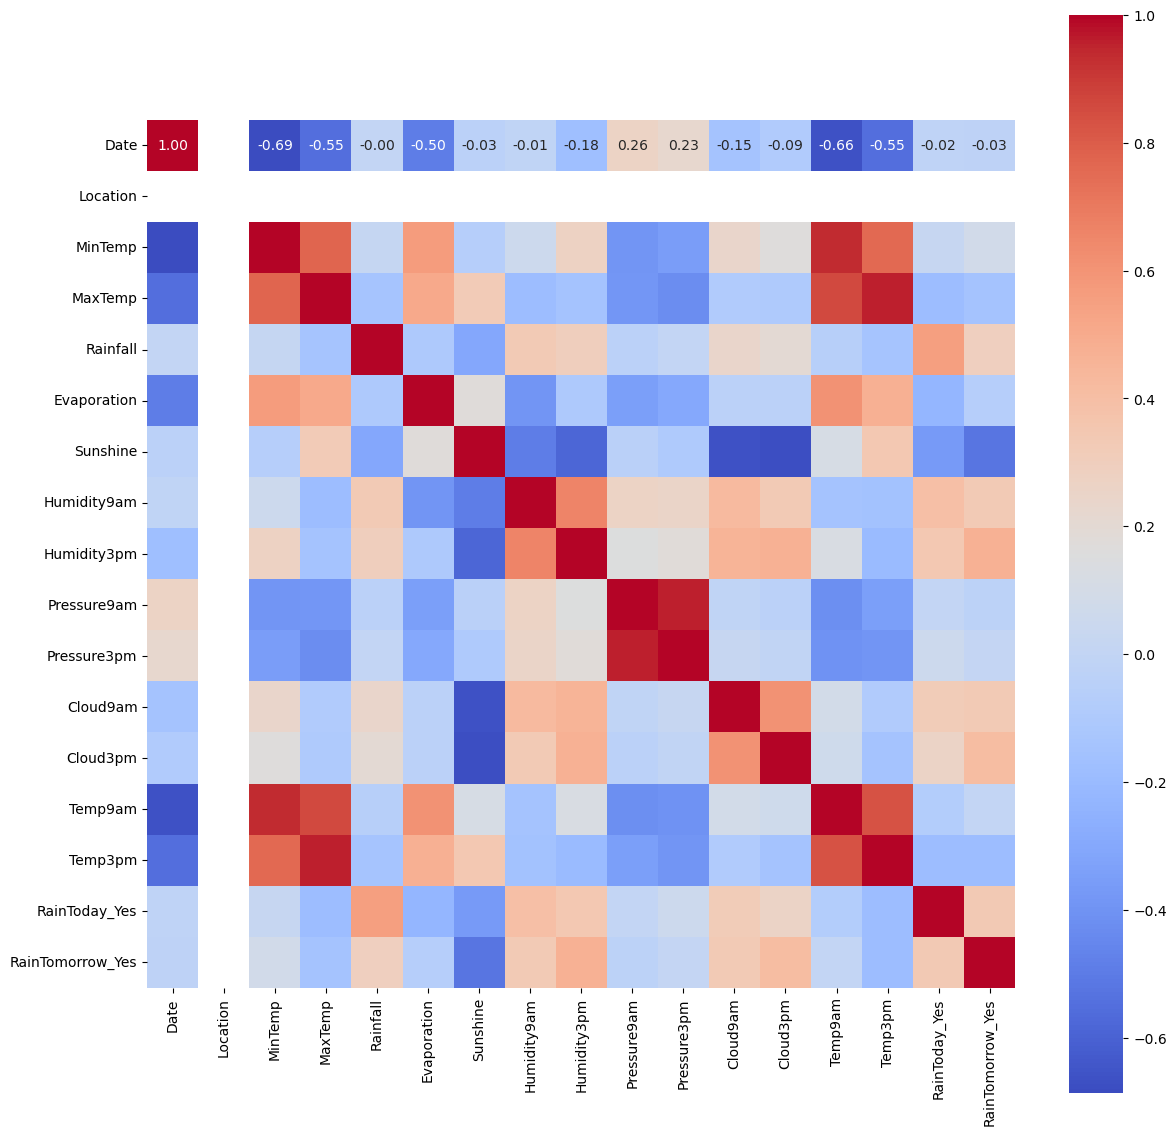

In [180]:
plt.figure(figsize=(14, 14))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.show()

### Inferences from correlation matrix
#### 1. MinTemp and Temp9am have a high positive correlation (0.938814), and MaxTemp and Temp3pm (0.956508) also. This suggests that as minimum temperature increases, the temperature at 9am also tends to increase, and similarly for maximum temperature and temperature at 3pm.
#### 2.Sunshine and Cloud9am have a high negative correlation (-0.660555), means that more sunshine corresponds to fewer clouds at 9am.
#### 3.RainToday_Yes and Rainfall also have a relatively high positive correlation (0.555015), indicating that rainfall is likely on days when RainToday_Yes is true

# MODEL TRAINING AND MODEL EVALUATION 

### Test-Train Split

In [181]:
x_multi = df.drop(['RainTomorrow_Yes','Date', 'Location'], axis=1)
y_multi = df['RainTomorrow_Yes']

#### Splitting the data into Test and Train dataset in which 80% of data belongs to Training dataset and 20% belongs to Test dataset

In [183]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_multi,y_multi,test_size=0.2,random_state=0)

In [184]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(2669, 14) (668, 14) (2669,) (668,)


# Logistics regression 

In [193]:
# Creating a Logistic Regression object lr1
lr1=LogisticRegression()

# Fitting the model to the training data
lr1.fit(x_train,y_train)

C:\Users\The Computer World\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [188]:
#intercept i.e. Beta 0 value
lr1.intercept_

array([0.00070015])

In [189]:
#coefficient i.e. beta 1 value
lr1.coef_

array([[-0.11784452,  0.09636095,  0.03152406,  0.01715016, -0.2035078 ,
         0.00357131,  0.05069357, -0.05879374,  0.05471374, -0.06392106,
         0.19856208,  0.04285867, -0.0374043 ,  0.05760443]])

### Evaluation

In [192]:
# Model Performance
cfm_train_lr = confusion_matrix(y_train, lr1.predict(x_train))
acs_train_lr = accuracy_score(y_train, lr1.predict(x_train))
pcs_train_lr = precision_score(y_train,lr1.predict(x_train))
rcs_train_lr = recall_score(y_train, lr1.predict(x_train))
roc_auc_score_train_lr = roc_auc_score(y_train, lr1.predict(x_train))
cfm_test_lr = confusion_matrix(y_test, lr1.predict(x_test))
acs_test_lr = accuracy_score(y_test,lr1.predict(x_test))
pcs_test_lr = precision_score(y_test, lr1.predict(x_test))
rcs_test_lr = recall_score(y_test, lr1.predict(x_test))
roc_auc_score_test_lr = roc_auc_score(y_test, lr1.predict(x_test))

# Print the results for Logistic Regression Model
print("Logistic Regression Results:")
print("Confusion Matrix (Training Data):")
print(cfm_train_lr)
print("\nAccuracy Score (Training Data):", acs_train_lr)
print("\nPrecision Score (Training Data):", pcs_train_lr)
print("\nRecall Score (Training Data):", rcs_train_lr)
print("\nROC AUC Score (Training Data):", roc_auc_score_train_lr)
print("\n------------------------------------------------------")
print("\nConfusion Matrix (Testing Data):")
print(cfm_test_lr)
print("\nAccuracy Score (Testing Data):", acs_test_lr)
print("\nPrecision Score (Testing Data):", pcs_test_lr)
print("\nRecall Score (Testing Data):", rcs_test_lr)
print("\nROC AUC Score (Testing Data):", roc_auc_score_test_lr)
print("\n------------------------------------------------------")

Logistic Regression Results:
Confusion Matrix (Training Data):
[[1808  154]
 [ 306  401]]

Accuracy Score (Training Data): 0.827650805545148

Precision Score (Training Data): 0.7225225225225225

Recall Score (Training Data): 0.5671852899575672

ROC AUC Score (Training Data): 0.7443469772927489

------------------------------------------------------

Confusion Matrix (Testing Data):
[[474  36]
 [ 75  83]]

Accuracy Score (Testing Data): 0.8338323353293413

Precision Score (Testing Data): 0.6974789915966386

Recall Score (Testing Data): 0.5253164556962026

ROC AUC Score (Testing Data): 0.7273641102010425

------------------------------------------------------


# Logistics Regression using GridSearchCV

In [196]:
#importing necessary module
from sklearn.model_selection import GridSearchCV

# Creating a Logistic Regression object wth random state
lr_gs = LogisticRegression(random_state=0)

# Defining different parameter dictionary for GridSearchCV like penalty which Specify the norm of the penalty and C which is Inverse of regularization strength
param_grid_lr_gs = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
}

# Performing GridSearchCV and fitting the model on trained dataset
lr_gs1 = GridSearchCV(lr_gs, param_grid_lr_gs, cv=3, scoring='accuracy')
lr_gs1.fit(x_train, y_train)

C:\Users\The Computer World\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\The Computer World\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

GridSearchCV(cv=3, estimator=LogisticRegression(random_state=0),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [207]:
# Getting the best parameters and best estimators from the fitted model
best_params_lr = lr_gs1.best_params_
best_est_lr = lr_gs1.best_estimator_
print(best_params_lr)
print(best_est_lr)

{'C': 0.001, 'penalty': 'l2'}
LogisticRegression(C=0.001, random_state=0)


In [211]:
# performing logistics regression with best parameters
lr_gs_=LogisticRegression(penalty='l2',C=0.001,random_state=0)

# fitting the trained model
lr_gs_.fit(x_train,y_train)

C:\Users\The Computer World\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.001, random_state=0)

### Evaluation

In [212]:
# Model Performance
cfm_train_lrgs = confusion_matrix(y_train, lr_gs_.predict(x_train))
acs_train_lrgs = accuracy_score(y_train, lr_gs_.predict(x_train))
pcs_train_lrgs = precision_score(y_train,lr_gs_.predict(x_train))
rcs_train_lrgs = recall_score(y_train, lr_gs_.predict(x_train))
roc_auc_score_train_lrgs = roc_auc_score(y_train, lr_gs_.predict(x_train))
cfm_test_lrgs = confusion_matrix(y_test, lr_gs_.predict(x_test))
acs_test_lrgs = accuracy_score(y_test,lr_gs_.predict(x_test))
pcs_test_lrgs = precision_score(y_test, lr_gs_.predict(x_test))
rcs_test_lrgs = recall_score(y_test, lr_gs_.predict(x_test))
roc_auc_score_test_lrgs = roc_auc_score(y_test, lr_gs_.predict(x_test))

# Print the results for Logistic Regression Model
print("Logistic Regression with GridSearchCV Results:")
print("Confusion Matrix (Training Data):")
print(cfm_train_lrgs)
print("\nAccuracy Score (Training Data):", acs_train_lrgs)
print("\nPrecision Score (Training Data):", pcs_train_lrgs)
print("\nRecall Score (Training Data):", rcs_train_lrgs)
print("\nROC AUC Score (Training Data):", roc_auc_score_train_lrgs)
print("\n------------------------------------------------------")
print("\nConfusion Matrix (Testing Data):")
print(cfm_test_lrgs)
print("\nAccuracy Score (Testing Data):", acs_test_lrgs)
print("\nPrecision Score (Testing Data):", pcs_test_lrgs)
print("\nRecall Score (Testing Data):", rcs_test_lrgs)
print("\nROC AUC Score (Testing Data):", roc_auc_score_test_lrgs)
print("\n------------------------------------------------------")

Logistic Regression with GridSearchCV Results:
Confusion Matrix (Training Data):
[[1831  131]
 [ 327  380]]

Accuracy Score (Training Data): 0.8284001498688648

Precision Score (Training Data): 0.7436399217221135

Recall Score (Training Data): 0.5374823196605375

ROC AUC Score (Training Data): 0.7353568580973431

------------------------------------------------------

Confusion Matrix (Testing Data):
[[478  32]
 [ 80  78]]

Accuracy Score (Testing Data): 0.8323353293413174

Precision Score (Testing Data): 0.7090909090909091

Recall Score (Testing Data): 0.4936708860759494

ROC AUC Score (Testing Data): 0.7154628940183668

------------------------------------------------------


# Linear Discriminant analysis(LDA)

In [200]:
# importing necessary modules
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# creating lda object to train the model
lda=LinearDiscriminantAnalysis()

#fitting the model
lda.fit(x_train,y_train)

LinearDiscriminantAnalysis()

### Evaluation

In [202]:
# Model Performance
cfm_train_lda = confusion_matrix(y_train, lda.predict(x_train))
acs_train_lda = accuracy_score(y_train, lda.predict(x_train))
pcs_train_lda = precision_score(y_train,lda.predict(x_train))
rcs_train_lda = recall_score(y_train, lda.predict(x_train))
roc_auc_score_train_lda = roc_auc_score(y_train, lda.predict(x_train))
cfm_test_lda = confusion_matrix(y_test, lda.predict(x_test))
acs_test_lda = accuracy_score(y_test,lda.predict(x_test))
pcs_test_lda = precision_score(y_test, lda.predict(x_test))
rcs_test_lda = recall_score(y_test, lda.predict(x_test))
roc_auc_score_test_lda = roc_auc_score(y_test, lda.predict(x_test))

# Print the result for Model
print("Linear Discriminant Analysis Results:")
print("Confusion Matrix (Training Data):")
print(cfm_train_lda)
print("\nAccuracy Score (Training Data):", acs_train_lda)
print("\nPrecision Score (Training Data):", pcs_train_lda)
print("\nRecall Score (Training Data):", rcs_train_lda)
print("\nROC AUC Score (Training Data):", roc_auc_score_train_lda)
print("\n------------------------------------------------------")
print("\nConfusion Matrix (Testing Data):")
print(cfm_test_lda)
print("\nAccuracy Score (Testing Data):", acs_test_lda)
print("\nPrecision Score (Testing Data):", pcs_test_lda)
print("\nRecall Score (Testing Data):", rcs_test_lda)
print("\nROC AUC Score (Testing Data):", roc_auc_score_test_lda)
print("\n------------------------------------------------------")

Linear Discriminant Analysis Results:
Confusion Matrix (Training Data):
[[1797  165]
 [ 286  421]]

Accuracy Score (Training Data): 0.8310228550018733

Precision Score (Training Data): 0.7184300341296929

Recall Score (Training Data): 0.5954738330975955

ROC AUC Score (Training Data): 0.7556879868851891

------------------------------------------------------

Confusion Matrix (Testing Data):
[[472  38]
 [ 69  89]]

Accuracy Score (Testing Data): 0.8398203592814372

Precision Score (Testing Data): 0.7007874015748031

Recall Score (Testing Data): 0.5632911392405063

ROC AUC Score (Testing Data): 0.7443906676594688

------------------------------------------------------


# Linear Discriminant Analysis with GridSearchCV

In [205]:
# creating lda object
lda_gs=LinearDiscriminantAnalysis()

#Defining parameters for GridSearchCv like solver and shrinkage
params_gs={
    'solver':['svd','lsqr','eigen'],
    'shrinkage':[0 , 1, 0.01],
}

# Performing GridSearchCV and fitting the model
lda_gs1=GridSearchCV(lda_gs,params_gs,scoring='accuracy', n_jobs=-1)
lda_gs1.fit(x_train,y_train)

C:\Users\The Computer World\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\The Computer World\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\The Computer World\anaconda\Lib\site-packages\sklearn\discriminant_analysis.py", line 615, in fit
    raise NotImplementedError("shrinkage not supported with 'svd' solver.")
NotImplementedError: shrinkage not supported with 'svd' solver.

  warnings.warn(some_fits_fail

GridSearchCV(estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'shrinkage': [0, 1, 0.01],
                         'solver': ['svd', 'lsqr', 'eigen']},
             scoring='accuracy')

In [213]:
# Getting the best parameters and best estimators from the fitted model
best_params_ldags = lda_gs1.best_params_
best_est_ldags = lda_gs1.best_estimator_
print(best_params_ldags)
print(best_est_ldags)

{'shrinkage': 0, 'solver': 'lsqr'}
LinearDiscriminantAnalysis(shrinkage=0, solver='lsqr')


In [214]:
# performing lda with best parameters
lda_gs_=LinearDiscriminantAnalysis(shrinkage=0, solver='lsqr')

# fitting the trained model
lda_gs_.fit(x_train,y_train)

LinearDiscriminantAnalysis(shrinkage=0, solver='lsqr')

### Evaluation

In [217]:
# Model Performance
cfm_train_ldags = confusion_matrix(y_train, lda_gs_.predict(x_train))
acs_train_ldags = accuracy_score(y_train, lda_gs_.predict(x_train))
pcs_train_ldags = precision_score(y_train,lda_gs_.predict(x_train))
rcs_train_ldags = recall_score(y_train, lda_gs_.predict(x_train))
roc_auc_score_train_ldags = roc_auc_score(y_train, lda_gs_.predict(x_train))
cfm_test_ldags = confusion_matrix(y_test, lda_gs_.predict(x_test))
acs_test_ldags = accuracy_score(y_test,lda_gs_.predict(x_test))
pcs_test_ldags = precision_score(y_test, lda_gs_.predict(x_test))
rcs_test_ldags = recall_score(y_test, lda_gs_.predict(x_test))
roc_auc_score_test_ldags = roc_auc_score(y_test, lda_gs_.predict(x_test))

# Print the result for Model
print("Linear Discriminant Analysis with GridSearchCV Results:")
print("Confusion Matrix (Training Data):")
print(cfm_train_ldags)
print("\nAccuracy Score (Training Data):", acs_train_ldags)
print("\nPrecision Score (Training Data):", pcs_train_ldags)
print("\nRecall Score (Training Data):", rcs_train_ldags)
print("\nROC AUC Score (Training Data):", roc_auc_score_train_ldags)
print("\n------------------------------------------------------")
print("\nConfusion Matrix (Testing Data):")
print(cfm_test_ldags)
print("\nAccuracy Score (Testing Data):", acs_test_ldags)
print("\nPrecision Score (Testing Data):", pcs_test_ldags)
print("\nRecall Score (Testing Data):", rcs_test_ldags)
print("\nROC AUC Score (Testing Data):", roc_auc_score_test_ldags)
print("\n------------------------------------------------------")

Linear Discriminant Analysis with GridSearchCV Results:
Confusion Matrix (Training Data):
[[1797  165]
 [ 286  421]]

Accuracy Score (Training Data): 0.8310228550018733

Precision Score (Training Data): 0.7184300341296929

Recall Score (Training Data): 0.5954738330975955

ROC AUC Score (Training Data): 0.7556879868851891

------------------------------------------------------

Confusion Matrix (Testing Data):
[[472  38]
 [ 69  89]]

Accuracy Score (Testing Data): 0.8398203592814372

Precision Score (Testing Data): 0.7007874015748031

Recall Score (Testing Data): 0.5632911392405063

ROC AUC Score (Testing Data): 0.7443906676594688

------------------------------------------------------


# K nearest Neighbours classifier

In [218]:
# Standardising the data
#importing necessary modules
from sklearn import preprocessing

# creating scaler object and transforming the variable
scaler= preprocessing.StandardScaler().fit(x_train)
x_train_s=scaler.transform(x_train)
scaler= preprocessing.StandardScaler().fit(x_train)
x_test_s=scaler.transform(x_test)

In [219]:
# importing necessary modules
from sklearn.neighbors import KNeighborsClassifier

#creating a knn object with k=1
knn=KNeighborsClassifier(n_neighbors=1)

# fitting the trained model
knn.fit(x_train_s,y_train)

KNeighborsClassifier(n_neighbors=1)

### Evaluation

In [220]:
# Model Performance
cfm_train_knn = confusion_matrix(y_train, knn.predict(x_train))
acs_train_knn = accuracy_score(y_train, knn.predict(x_train))
pcs_train_knn = precision_score(y_train,knn.predict(x_train))
rcs_train_knn = recall_score(y_train, knn.predict(x_train))
roc_auc_score_train_knn = roc_auc_score(y_train, knn.predict(x_train))
cfm_test_knn = confusion_matrix(y_test, knn.predict(x_test))
acs_test_knn = accuracy_score(y_test,knn.predict(x_test))
pcs_test_knn = precision_score(y_test, knn.predict(x_test))
rcs_test_knn = recall_score(y_test, knn.predict(x_test))
roc_auc_score_test_knn = roc_auc_score(y_test, knn.predict(x_test))

# Print the result for Model
print("K Nearest Neighbors Results:")
print("Confusion Matrix (Training Data):")
print(cfm_train_knn)
print("\nAccuracy Score (Training Data):", acs_train_knn)
print("\nPrecision Score (Training Data):", pcs_train_knn)
print("\nRecall Score (Training Data):", rcs_train_knn)
print("\nROC AUC Score (Training Data):", roc_auc_score_train_knn)
print("\n------------------------------------------------------")
print("\nConfusion Matrix (Testing Data):")
print(cfm_test_knn)
print("\nAccuracy Score (Testing Data):", acs_test_knn)
print("\nPrecision Score (Testing Data):", pcs_test_knn)
print("\nRecall Score (Testing Data):", rcs_test_knn)
print("\nROC AUC Score (Testing Data):", roc_auc_score_test_knn)
print("\n------------------------------------------------------")

C:\Users\The Computer World\anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\The Computer World\anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\The Computer World\anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\The Computer World\anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\The Computer World\anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\The Computer World\anaconda\Lib\site-packages\sklearn\base.py:432:

K Nearest Neighbors Results:
Confusion Matrix (Training Data):
[[1954    8]
 [ 571  136]]

Accuracy Score (Training Data): 0.7830648182840015

Precision Score (Training Data): 0.9444444444444444

Recall Score (Training Data): 0.19236209335219237

ROC AUC Score (Training Data): 0.5941423106924061

------------------------------------------------------

Confusion Matrix (Testing Data):
[[508   2]
 [134  24]]

Accuracy Score (Testing Data): 0.7964071856287425

Precision Score (Testing Data): 0.9230769230769231

Recall Score (Testing Data): 0.1518987341772152

ROC AUC Score (Testing Data): 0.5739885827748821

------------------------------------------------------


C:\Users\The Computer World\anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


# K nearest Neighbours classifier with GridSearchCv

In [228]:
# creating a knn object for gridsearchcv
knn_gs=KNeighborsClassifier()

# defining dictionary of parameter for training the model
params = {
    'n_neighbors' : [1,2,3,4,5,6,7,8,9,10]
}

#performing GridSearchCV on trained data with params
knn_gs1=GridSearchCV(knn_gs,params)

#fitting the model
knn_gs1.fit(x_train_s,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [229]:
# Getting Best parameters and best estimators after GridSearchCv 
best_params_knn = knn_gs1.best_params_
best_est_knn = knn_gs1.best_estimator_
print(best_params_knn)
print(best_est_knn)

{'n_neighbors': 9}
KNeighborsClassifier(n_neighbors=9)


In [232]:
# performing Knn Classification with best hyperparameters

# creating knn object
knn_gs_=KNeighborsClassifier(n_neighbors=9)

#fitting the model
knn_gs_.fit(x_train_s,y_train)

KNeighborsClassifier(n_neighbors=9)

### Evaluation

In [234]:
# Model Performance
cfm_train_knngs = confusion_matrix(y_train, knn_gs_.predict(x_train))
acs_train_knngs = accuracy_score(y_train, knn_gs_.predict(x_train))
pcs_train_knngs = precision_score(y_train,knn_gs_.predict(x_train))
rcs_train_knngs = recall_score(y_train, knn_gs_.predict(x_train))
roc_auc_score_train_knngs = roc_auc_score(y_train, knn_gs_.predict(x_train))
cfm_test_knngs = confusion_matrix(y_test, knn_gs_.predict(x_test))
acs_test_knngs = accuracy_score(y_test,knn_gs_.predict(x_test))
pcs_test_knngs = precision_score(y_test, knn_gs_.predict(x_test))
rcs_test_knngs = recall_score(y_test, knn_gs_.predict(x_test))
roc_auc_score_test_knngs = roc_auc_score(y_test, knn_gs_.predict(x_test))

# Print the result for Model
print("K Nearest Neighbors  with GridSearchCV Results:")
print("Confusion Matrix (Training Data):")
print(cfm_train_knngs)
print("\nAccuracy Score (Training Data):", acs_train_knngs)
print("\nPrecision Score (Training Data):", pcs_train_knngs)
print("\nRecall Score (Training Data):", rcs_train_knngs)
print("\nROC AUC Score (Training Data):", roc_auc_score_train_knngs)
print("\n------------------------------------------------------")
print("\nConfusion Matrix (Testing Data):")
print(cfm_test_knngs)
print("\nAccuracy Score (Testing Data):", acs_test_knngs)
print("\nPrecision Score (Testing Data):", pcs_test_knngs)
print("\nRecall Score (Testing Data):", rcs_test_knngs)
print("\nROC AUC Score (Testing Data):", roc_auc_score_test_knngs)
print("\n------------------------------------------------------")

C:\Users\The Computer World\anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\The Computer World\anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\The Computer World\anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\The Computer World\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\The Computer World\anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was 

K Nearest Neighbors  with GridSearchCV Results:
Confusion Matrix (Training Data):
[[1962    0]
 [ 707    0]]

Accuracy Score (Training Data): 0.7351067815661296

Precision Score (Training Data): 0.0

Recall Score (Training Data): 0.0

ROC AUC Score (Training Data): 0.5

------------------------------------------------------

Confusion Matrix (Testing Data):
[[510   0]
 [158   0]]

Accuracy Score (Testing Data): 0.7634730538922155

Precision Score (Testing Data): 0.0

Recall Score (Testing Data): 0.0

ROC AUC Score (Testing Data): 0.5

------------------------------------------------------


C:\Users\The Computer World\anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


# Decision Tree Classifier

In [235]:
# importing necessary module
from sklearn import tree

# Creating a regressor object with DecisionTreeRegressor having maximum depth as 3 
regtree=tree.DecisionTreeClassifier(max_depth=3)

# Fitting training data
regtree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

### Evaluation

In [236]:
# Model Performance
cfm_train_dtc = confusion_matrix(y_train, regtree.predict(x_train))
acs_train_dtc = accuracy_score(y_train, regtree.predict(x_train))
pcs_train_dtc = precision_score(y_train, regtree.predict(x_train))
rcs_train_dtc = recall_score(y_train, regtree.predict(x_train))
roc_auc_score_train_dtc = roc_auc_score(y_train, regtree.predict(x_train))
cfm_test_dtc = confusion_matrix(y_test, regtree.predict(x_test))
acs_test_dtc = accuracy_score(y_test, regtree.predict(x_test))
pcs_test_dtc = precision_score(y_test, regtree.predict(x_test))
rcs_test_dtc = recall_score(y_test, regtree.predict(x_test))
roc_auc_score_test_dtc = roc_auc_score(y_test, regtree.predict(x_test))

# Print the result for Model
print("Decision Tree Classifier Results:")
print("Confusion Matrix (Training Data):")
print(cfm_train_dtc)
print("\nAccuracy Score (Training Data):", acs_train_dtc)
print("\nPrecision Score (Training Data):", pcs_train_dtc)
print("\nRecall Score (Training Data):", rcs_train_dtc)
print("\nROC AUC Score (Training Data):", roc_auc_score_train_dtc)
print("\n------------------------------------------------------")
print("\nConfusion Matrix (Testing Data):")
print(cfm_test_dtc)
print("\nAccuracy Score (Testing Data):", acs_test_dtc)
print("\nPrecision Score (Testing Data):", pcs_test_dtc)
print("\nRecall Score (Testing Data):", rcs_test_dtc)
print("\nROC AUC Score (Testing Data):", roc_auc_score_test_dtc)
print("\n------------------------------------------------------")

Decision Tree Classifier Results:
Confusion Matrix (Training Data):
[[1777  185]
 [ 279  428]]

Accuracy Score (Training Data): 0.8261521168977145

Precision Score (Training Data): 0.6982055464926591

Recall Score (Training Data): 0.6053748231966054

ROC AUC Score (Training Data): 0.7555416419754688

------------------------------------------------------

Confusion Matrix (Testing Data):
[[457  53]
 [ 73  85]]

Accuracy Score (Testing Data): 0.811377245508982

Precision Score (Testing Data): 0.6159420289855072

Recall Score (Testing Data): 0.5379746835443038

ROC AUC Score (Testing Data): 0.7170265574584264

------------------------------------------------------


# Decision Tree Classification with GridSearchCV

In [237]:
# Defining the hyperparameters and their  values
param_grid = {
    'max_depth': [2, 4, 5, 7],  # List of  maximum depths
    'min_samples_split': [2,4, 5,6, 10],  # List of values for minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4,6,8]  # List of values for minimum samples required at a leaf node
}
# Creating a Classification object
regtree_gs = tree.DecisionTreeClassifier()

# Creating the GridSearchCV object
grid_search1 = GridSearchCV(regtree_gs, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fitting the GridSearchCV to the training data
grid_search1.fit(x_train, y_train)

C:\Users\The Computer World\anaconda\Lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 5, 7],
                         'min_samples_leaf': [1, 2, 4, 6, 8],
                         'min_samples_split': [2, 4, 5, 6, 10]},
             scoring='neg_mean_squared_error')

In [238]:
#getting the best hyperparameter from given hyperparametes dictionary
print("Best Hyperparameters: ", grid_search1.best_params_)
print("Best estimators: ",grid_search1.best_estimator_)

Best Hyperparameters:  {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best estimators:  DecisionTreeClassifier(max_depth=2)


In [239]:
# Creating a classification object with DecisionTreeClassifier having best hyperparameters given above
regtree2=tree.DecisionTreeClassifier(max_depth=2,min_samples_leaf=1,min_samples_split=2)

# Fitting training data
regtree2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

### Evalution

In [240]:
# Model Performance
cfm_train_dtcgs = confusion_matrix(y_train, regtree2.predict(x_train))
acs_train_dtcgs = accuracy_score(y_train, regtree2.predict(x_train))
pcs_train_dtcgs = precision_score(y_train, regtree2.predict(x_train))
rcs_train_dtcgs = recall_score(y_train, regtree2.predict(x_train))
roc_auc_score_train_dtcgs = roc_auc_score(y_train, regtree2.predict(x_train))
cfm_test_dtcgs = confusion_matrix(y_test, regtree2.predict(x_test))
acs_test_dtcgs = accuracy_score(y_test, regtree2.predict(x_test))
pcs_test_dtcgs = precision_score(y_test, regtree2.predict(x_test))
rcs_test_dtcgs = recall_score(y_test, regtree2.predict(x_test))
roc_auc_score_test_dtcgs = roc_auc_score(y_test, regtree2.predict(x_test))

# Print the result for Model
print("Decision Tree Classifier with GridSearchCv Results:")
print("Confusion Matrix (Training Data):")
print(cfm_train_dtcgs)
print("\nAccuracy Score (Training Data):", acs_train_dtcgs)
print("\nPrecision Score (Training Data):", pcs_train_dtcgs)
print("\nRecall Score (Training Data):", rcs_train_dtcgs)
print("\nROC AUC Score (Training Data):", roc_auc_score_train_dtcgs)
print("\n------------------------------------------------------")
print("\nConfusion Matrix (Testing Data):")
print(cfm_test_dtcgs)
print("\nAccuracy Score (Testing Data):", acs_test_dtcgs)
print("\nPrecision Score (Testing Data):", pcs_test_dtcgs)
print("\nRecall Score (Testing Data):", rcs_test_dtcgs)
print("\nROC AUC Score (Testing Data):", roc_auc_score_test_dtcgs)
print("\n------------------------------------------------------")

Decision Tree Classifier with GridSearchCv Results:
Confusion Matrix (Training Data):
[[1893   69]
 [ 412  295]]

Accuracy Score (Training Data): 0.8197826901461222

Precision Score (Training Data): 0.8104395604395604

Recall Score (Training Data): 0.41725601131541723

ROC AUC Score (Training Data): 0.6910439077983813

------------------------------------------------------

Confusion Matrix (Testing Data):
[[488  22]
 [100  58]]

Accuracy Score (Testing Data): 0.8173652694610778

Precision Score (Testing Data): 0.725

Recall Score (Testing Data): 0.3670886075949367

ROC AUC Score (Testing Data): 0.661975676346488

------------------------------------------------------


# Bagging Classification with GridSearchCV

In [241]:
# importing necessary module
from sklearn.ensemble import BaggingClassifier

# Create a random classification model
ran_model = tree.DecisionTreeClassifier()

# Create a BaggingRegressor with the random model
bagging_cl = BaggingClassifier(ran_model, random_state=0)

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100, 150, 200]  # List of possible numbers of random models
}

# Create the GridSearchCV object
grid_search2 = GridSearchCV(bagging_cl, param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search2.fit(x_train, y_train)

C:\Users\The Computer World\anaconda\Lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=5,
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier(),
                                         random_state=0),
             n_jobs=-1, param_grid={'n_estimators': [50, 100, 150, 200]},
             scoring='r2')

In [242]:
#getting the best hyperparameter and best estimator from given hyperparametes dictionary
print("Best Hyperparameters: ", grid_search2.best_params_)
print("Best estimators: ",grid_search2.best_estimator_)

Best Hyperparameters:  {'n_estimators': 50}
Best estimators:  BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50,
                  random_state=0)


In [243]:
#creating model with best params
bagging_cl2 = BaggingClassifier(ran_model,n_estimators=50, random_state=0)

bagging_cl2.fit(x_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50,
                  random_state=0)

### Evaluation

In [248]:
# Model Performance
cfm_train_baggs = confusion_matrix(y_train, bagging_cl2.predict(x_train))
acs_train_baggs = accuracy_score(y_train, bagging_cl2.predict(x_train))
pcs_train_baggs = precision_score(y_train, bagging_cl2.predict(x_train))
rcs_train_baggs = recall_score(y_train, bagging_cl2.predict(x_train))
roc_auc_score_train_baggs = roc_auc_score(y_train, bagging_cl2.predict(x_train))
cfm_test_baggs = confusion_matrix(y_test, bagging_cl2.predict(x_test))
acs_test_baggs = accuracy_score(y_test, bagging_cl2.predict(x_test))
pcs_test_baggs = precision_score(y_test, bagging_cl2.predict(x_test))
rcs_test_baggs = recall_score(y_test, bagging_cl2.predict(x_test))
roc_auc_score_test_baggs = roc_auc_score(y_test, bagging_cl2.predict(x_test))

# Print the result for Model
print("Decision Tree Bagging Classifier with GridSearchCv Results:")
print("Confusion Matrix (Training Data):")
print(cfm_train_baggs)
print("\nAccuracy Score (Training Data):", acs_train_baggs)
print("\nPrecision Score (Training Data):", pcs_train_baggs)
print("\nRecall Score (Training Data):", rcs_train_baggs)
print("\nROC AUC Score (Training Data):", roc_auc_score_train_baggs)
print("\n------------------------------------------------------")
print("\nConfusion Matrix (Testing Data):")
print(cfm_test_baggs)
print("\nAccuracy Score (Testing Data):", acs_test_baggs)
print("\nPrecision Score (Testing Data):", pcs_test_baggs)
print("\nRecall Score (Testing Data):", rcs_test_baggs)
print("\nROC AUC Score (Testing Data):", roc_auc_score_test_baggs)
print("\n------------------------------------------------------")

Decision Tree Bagging Classifier with GridSearchCv Results:
Confusion Matrix (Training Data):
[[1962    0]
 [   1  706]]

Accuracy Score (Training Data): 0.9996253278381416

Precision Score (Training Data): 1.0

Recall Score (Training Data): 0.9985855728429985

ROC AUC Score (Training Data): 0.9992927864214993

------------------------------------------------------

Confusion Matrix (Testing Data):
[[472  38]
 [ 74  84]]

Accuracy Score (Testing Data): 0.8323353293413174

Precision Score (Testing Data): 0.6885245901639344

Recall Score (Testing Data): 0.5316455696202531

ROC AUC Score (Testing Data): 0.7285678828493423

------------------------------------------------------


# Random Forest Classification with GridSearchCv

In [245]:
# importing necessary module
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameters and their possible values
param_grid2 = {
    'n_estimators': [100,  200],  # Number of trees in the forest
    'max_depth': [10, 30],  # Maximum depth of the trees
    'min_samples_split': [3,6],  # Minimum samples required to split a node
    'min_samples_leaf': [ 3,6]  # Minimum samples required at a leaf node
}

# Create a RandomForestClassification object
rfc_gs = RandomForestClassifier()

# Create the GridSearchCV object
grid_search3 = GridSearchCV(rfc_gs, param_grid2, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search3.fit(x_train, y_train)

C:\Users\The Computer World\anaconda\Lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 30], 'min_samples_leaf': [3, 6],
                         'min_samples_split': [3, 6],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error')

In [246]:
#getting the best hyperparameter from given hyperparametes dictionary
print("Best Hyperparameters: ", grid_search3.best_params_)
print("Best estimators: ",grid_search3.best_estimator_)

Best Hyperparameters:  {'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 100}
Best estimators:  RandomForestClassifier(max_depth=10, min_samples_leaf=3, min_samples_split=3)


In [247]:
#creating model with best params
rfc_gs1 = RandomForestClassifier(max_depth=10,min_samples_leaf=3,min_samples_split=3,n_estimators=100)

#fitting the model
rfc_gs1.fit(x_train,y_train)


RandomForestClassifier(max_depth=10, min_samples_leaf=3, min_samples_split=3)

### Evaluation

In [249]:
# Model Performance
cfm_train_rfc = confusion_matrix(y_train, rfc_gs1.predict(x_train))
acs_train_rfc = accuracy_score(y_train, rfc_gs1.predict(x_train))
pcs_train_rfc = precision_score(y_train, rfc_gs1.predict(x_train))
rcs_train_rfc = recall_score(y_train, rfc_gs1.predict(x_train))
roc_auc_score_train_rfc = roc_auc_score(y_train, rfc_gs1.predict(x_train))
cfm_test_rfc = confusion_matrix(y_test, rfc_gs1.predict(x_test))
acs_test_rfc = accuracy_score(y_test, rfc_gs1.predict(x_test))
pcs_test_rfc = precision_score(y_test, rfc_gs1.predict(x_test))
rcs_test_rfc = recall_score(y_test, rfc_gs1.predict(x_test))
roc_auc_score_test_rfc = roc_auc_score(y_test, rfc_gs1.predict(x_test))

# Print the result for Model
print("Random Forest Classifier with GridSearchCv Results:")
print("Confusion Matrix (Training Data):")
print(cfm_train_rfc)
print("\nAccuracy Score (Training Data):", acs_train_rfc)
print("\nPrecision Score (Training Data):", pcs_train_rfc)
print("\nRecall Score (Training Data):", rcs_train_rfc)
print("\nROC AUC Score (Training Data):", roc_auc_score_train_rfc)
print("\n------------------------------------------------------")
print("\nConfusion Matrix (Testing Data):")
print(cfm_test_rfc)
print("\nAccuracy Score (Testing Data):", acs_test_rfc)
print("\nPrecision Score (Testing Data):", pcs_test_rfc)
print("\nRecall Score (Testing Data):", rcs_test_rfc)
print("\nROC AUC Score (Testing Data):", roc_auc_score_test_rfc)
print("\n------------------------------------------------------")

Random Forest Classifier with GridSearchCv Results:
Confusion Matrix (Training Data):
[[1941   21]
 [ 215  492]]

Accuracy Score (Training Data): 0.9115773698014238

Precision Score (Training Data): 0.9590643274853801

Recall Score (Training Data): 0.695898161244696

ROC AUC Score (Training Data): 0.8425973986651615

------------------------------------------------------

Confusion Matrix (Testing Data):
[[488  22]
 [ 81  77]]

Accuracy Score (Testing Data): 0.8458083832335329

Precision Score (Testing Data): 0.7777777777777778

Recall Score (Testing Data): 0.4873417721518987

ROC AUC Score (Testing Data): 0.722102258624969

------------------------------------------------------


# Gradient Boosting Classification

In [251]:
# importing necessary module
from sklearn.ensemble import GradientBoostingClassifier

#creating Classification object
gbr=GradientBoostingClassifier(learning_rate=0.02,n_estimators=1000, max_depth=1)

#fitting the model
gbr.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.02, max_depth=1, n_estimators=1000)

### Evaluation

In [254]:
# Model Performance
cfm_train_gbc = confusion_matrix(y_train, gbr.predict(x_train))
acs_train_gbc = accuracy_score(y_train, gbr.predict(x_train))
pcs_train_gbc = precision_score(y_train, gbr.predict(x_train))
rcs_train_gbc = recall_score(y_train, gbr.predict(x_train))
roc_auc_score_train_gbc = roc_auc_score(y_train, gbr.predict(x_train))
cfm_test_gbc = confusion_matrix(y_test, gbr.predict(x_test))
acs_test_gbc = accuracy_score(y_test, gbr.predict(x_test))
pcs_test_gbc = precision_score(y_test, gbr.predict(x_test))
rcs_test_gbc = recall_score(y_test, gbr.predict(x_test))
roc_auc_score_test_gbc = roc_auc_score(y_test, gbr.predict(x_test))

# Print the result for Model
print("Gradient Boosting Classifier Results:")
print("Confusion Matrix (Training Data):")
print(cfm_train_gbc)
print("\nAccuracy Score (Training Data):", acs_train_gbc)
print("\nPrecision Score (Training Data):", pcs_train_gbc)
print("\nRecall Score (Training Data):", rcs_train_gbc)
print("\nROC AUC Score (Training Data):", roc_auc_score_train_gbc)
print("\n------------------------------------------------------")
print("\nConfusion Matrix (Testing Data):")
print(cfm_test_gbc)
print("\nAccuracy Score (Testing Data):", acs_test_gbc)
print("\nPrecision Score (Testing Data):", pcs_test_gbc)
print("\nRecall Score (Testing Data):", rcs_test_gbc)
print("\nROC AUC Score (Testing Data):", roc_auc_score_test_gbc)
print("\n------------------------------------------------------")

Gradient Boosting Classifier Results:
Confusion Matrix (Training Data):
[[1871   91]
 [ 319  388]]

Accuracy Score (Training Data): 0.8463844136380667

Precision Score (Training Data): 0.8100208768267223

Recall Score (Training Data): 0.5487977369165488

ROC AUC Score (Training Data): 0.7512082466437994

------------------------------------------------------

Confusion Matrix (Testing Data):
[[484  26]
 [ 81  77]]

Accuracy Score (Testing Data): 0.8398203592814372

Precision Score (Testing Data): 0.7475728155339806

Recall Score (Testing Data): 0.4873417721518987

ROC AUC Score (Testing Data): 0.7181806899975179

------------------------------------------------------


# Ada Boosting Classification

In [255]:
# importing necessary module
from sklearn.ensemble import AdaBoostClassifier

# creating classifier object
ada=AdaBoostClassifier(learning_rate=0.02,n_estimators=5000)

#fitting the model
ada.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.02, n_estimators=5000)

### Evaluation

In [257]:
# Model Performance
cfm_train_ada = confusion_matrix(y_train, ada.predict(x_train))
acs_train_ada = accuracy_score(y_train, ada.predict(x_train))
pcs_train_ada = precision_score(y_train, ada.predict(x_train))
rcs_train_ada = recall_score(y_train, ada.predict(x_train))
roc_auc_score_train_ada = roc_auc_score(y_train, ada.predict(x_train))
cfm_test_ada = confusion_matrix(y_test, ada.predict(x_test))
acs_test_ada = accuracy_score(y_test, ada.predict(x_test))
pcs_test_ada = precision_score(y_test, ada.predict(x_test))
rcs_test_ada = recall_score(y_test, ada.predict(x_test))
roc_auc_score_test_ada = roc_auc_score(y_test, ada.predict(x_test))

# Print the result for Model
print("Ada Boosting Classifier Results:")
print("Confusion Matrix (Training Data):")
print(cfm_train_ada)
print("\nAccuracy Score (Training Data):", acs_train_ada)
print("\nPrecision Score (Training Data):", pcs_train_ada)
print("\nRecall Score (Training Data):", rcs_train_ada)
print("\nROC AUC Score (Training Data):", roc_auc_score_train_ada)
print("\n------------------------------------------------------")
print("\nConfusion Matrix (Testing Data):")
print(cfm_test_ada)
print("\nAccuracy Score (Testing Data):", acs_test_ada)
print("\nPrecision Score (Testing Data):", pcs_test_ada)
print("\nRecall Score (Testing Data):", rcs_test_ada)
print("\nROC AUC Score (Testing Data):", roc_auc_score_test_ada)
print("\n------------------------------------------------------")

Ada Boosting Classifier Results:
Confusion Matrix (Training Data):
[[1873   89]
 [ 296  411]]

Accuracy Score (Training Data): 0.855751217684526

Precision Score (Training Data): 0.822

Recall Score (Training Data): 0.5813295615275813

ROC AUC Score (Training Data): 0.7679838429452381

------------------------------------------------------

Confusion Matrix (Testing Data):
[[481  29]
 [ 79  79]]

Accuracy Score (Testing Data): 0.8383233532934131

Precision Score (Testing Data): 0.7314814814814815

Recall Score (Testing Data): 0.5

ROC AUC Score (Testing Data): 0.7215686274509803

------------------------------------------------------


# XG Boost Classifier

In [259]:
# importing necessary module
import xgboost as xgb
from xgboost import XGBClassifier

# creating a regressor object
xgb=XGBClassifier(n_estimators=250,learning_rate=0.1,random_state=42)

xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=250, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

### Evaluation

In [261]:
# Model Performance
cfm_train_xgb = confusion_matrix(y_train, xgb.predict(x_train))
acs_train_xgb = accuracy_score(y_train, xgb.predict(x_train))
pcs_train_xgb = precision_score(y_train, xgb.predict(x_train))
rcs_train_xgb = recall_score(y_train, xgb.predict(x_train))
roc_auc_score_train_xgb = roc_auc_score(y_train, xgb.predict(x_train))
cfm_test_xgb = confusion_matrix(y_test, xgb.predict(x_test))
acs_test_xgb = accuracy_score(y_test, xgb.predict(x_test))
pcs_test_xgb = precision_score(y_test, xgb.predict(x_test))
rcs_test_xgb = recall_score(y_test, xgb.predict(x_test))
roc_auc_score_test_xgb = roc_auc_score(y_test, xgb.predict(x_test))

# Print the result for Model
print("XG Boosting Classifier Results:")
print("Confusion Matrix (Training Data):")
print(cfm_train_xgb)
print("\nAccuracy Score (Training Data):", acs_train_xgb)
print("\nPrecision Score (Training Data):", pcs_train_xgb)
print("\nRecall Score (Training Data):", rcs_train_xgb)
print("\nROC AUC Score (Training Data):", roc_auc_score_train_xgb)
print("\n------------------------------------------------------")
print("\nConfusion Matrix (Testing Data):")
print(cfm_test_xgb)
print("\nAccuracy Score (Testing Data):", acs_test_xgb)
print("\nPrecision Score (Testing Data):", pcs_test_xgb)
print("\nRecall Score (Testing Data):", rcs_test_xgb)
print("\nROC AUC Score (Testing Data):", roc_auc_score_test_xgb)
print("\n------------------------------------------------------")

XG Boosting Classifier Results:
Confusion Matrix (Training Data):
[[1962    0]
 [   7  700]]

Accuracy Score (Training Data): 0.9973772948669913

Precision Score (Training Data): 1.0

Recall Score (Training Data): 0.9900990099009901

ROC AUC Score (Training Data): 0.995049504950495

------------------------------------------------------

Confusion Matrix (Testing Data):
[[479  31]
 [ 70  88]]

Accuracy Score (Testing Data): 0.8488023952095808

Precision Score (Testing Data): 0.7394957983193278

Recall Score (Testing Data): 0.5569620253164557

ROC AUC Score (Testing Data): 0.7480888557954827

------------------------------------------------------


# QUESTIONS

## 1. Your views about the problem statement?
--> The problem statement is related to predicting Rainfall in Sydney using past data from 2008-2017. The given data contains 17 columns which includes Evaporation,Minimum temperatue,Maximum Temperature , Rain today and other Various rainfall predicting variables at 9am and 3pm like pressure ,humidity, clouds,Temperature, predicting variable Rain Tomorrow.The problem uses various classification model like Desicion tree and various ensemble techniques. These models can use features such as temperature, humidity, precipitation, and pressure to predict whether it will rain the next day or not.

## 2. What will be your approach to solving this task?
--> My approach to solve this task is as follows:

**1.DATA COLLECTION**
- Download the Sydney prediction csv file from project.
- Use pandas to upload the dataset into pandas dataframe.
- The main dataset is ready now for data Exploration.

**2.DATA EXPLORATION**
- Use df.haed() to get first 5 rows as output.
- Perform Exploratory Data Analysis(EDA) using df.describe().
- For missing value use df.info() to get number of columns and there data type.
- For outliers use for loop to visualise box plot for each numeric feature in dataset.
- Plot Distplot for columns that have outliers to check for skewness.

**2.DATA PREPROCESSING**
- Outliers are treated using capping (99th percentile and IQR method).
- Fiiling missing values with mean and filling missing values with mode for RainfallToday column 
- Convert categorical variables into numeric by creating dummy variables for categorical variable like RainfallToday and RainfallTomorrow.
- Convert non numerical column into numerical column using label encoding
- Use df.corr() to have correlation matrix to see relation between variables.

**3.MODEL SELETCION**
- Appropriate Classification model is chosen for predicting rainfall.
- Consider Classification model like Logistic Regression,Decision Tree Classification, Random Forest Classification, XG Boost Classification, Bagging Classification, Gradient Boosting Classification,Ada Boosting Classification.
- Try different model to evaluate and get the best project

**4.MODEL TRAINING AND MODEL EVALUATION**
- Data is split into test train dataset.
- Model is evaluated using Confusion matrix,accuracy scoe,recall score,roc auc score,precision score
- Select the model with best performance

**5.MODEL OPTIMIZATION**
- Optimize the model with GridSearchCv and hyperparameters.
   - For logistic Regression,LDA,KNN,Decision Tree Classification, Random Forest Classification, Bagging Classification,Gradient Boosting Classification,Ada Boosting Classification,XG Boosting Classification use GridSearchCV with range of parameters

**6.Conclusion**
- After performing  all model evaluate and choose the best model 

## 3. What were the available ML model options you had to perform this task?
--> For predicting salary, many ML model were available and each model have its own characteristics

**1 . Logistic Regression**
- Basic model for predicting categorical variable using maximum likelihood method.

**2 . Decision Tree Classification**
- Simple and interpretable model , used for categorizing data into classes.

**3 . Linear Discriminant Analysis**
- Preferred when response variable has more than 2 classes and it is based on bayes therorem.

**4 . K-Nearest Neighbors**
- It is a non-parametric,relying on proximity to make predictions or classifications for an individual data point.
  
**6 . Bagging Classification**
- Ensemble technique for Bootstrapped aggregation.
  
**7 . Random Forest Classifiaction**
- : It’s an ensemble learning technique that combines the predictions of multiple decision trees to improve accura.1.
  
**8 . Gradient Boosting Classification**
- Adjust residuals multiple times then create tree, highlyr pedicti.ve
  
**9 . Ada Boosting Classification**
- It adjusts weights according to prediction errors making it suitable and reliable for predicti.on
  
**10 . XG Boosting Classification**
- Uses a more regularised model to control over fitting giving it better performance.

To determine the best model, I'll test each and evaluate their performance usinaccuracy scoe,recall score,roc auc score,precision scoregor. The model with the best predictive accuracy will be selected for further optimization.

## 4. Which model’s performance is best and what could be the possible reason for that?
--> After evaluating several regression models to predict the target variable the results are:



**Logistic Regression**

- Accuracy Score (Training Data): 82.76 %
- Accuracy Score (Testing Data): 83.38 %
- Precision Score (Testing Data): 0.6974
- Recall Score (Testing Data): 0.5253
- ROC AUC Score (Testing Data): 0.7273

**Logistic Regression using GridSearchCV**

- Accuracy Score (Training Data):82.84 %
- Accuracy Score (Testing Data): 83.23 %
- Precision Score (Testing Data): 0.7090
- Recall Score (Testing Data): 0.4936
- ROC AUC Score (Testing Data): 0.7154

**Linear Discriminant Analysis(LDA)**

- Accuracy Score (Training Data): 83.10 %
- Accuracy Score (Testing Data): 83.98 %
- Precision Score (Testing Data): 0.7007
- Recall Score (Testing Data): 0.5632
- ROC AUC Score (Testing Data): 0.7443

**Linear Discriminant Analysis using GridSearchCV**

- Accuracy Score (Training Data): 83.10 %
- Accuracy Score (Testing Data): 83.98 %
- Precision Score (Testing Data): 0.7007
- Recall Score (Testing Data): 0.5632
- ROC AUC Score (Testing Data): 0.7443

**K-Nearest Neighbors**

- Accuracy Score (Training Data): 78.30 %
- Accuracy Score (Testing Data): 79.64 %
- Precision Score (Testing Data): 0.9230
- Recall Score (Testing Data): 0.1518
- ROC AUC Score (Testing Data): 0.5739

**K-Nearest Neighbors using GridSearchCV**

- Accuracy Score (Training Data): 73.51 %
- Accuracy Score (Testing Data): 76.34 %
- Precision Score (Testing Data): 0.0
- Recall Score (Testing Data): 0.0
- ROC AUC Score (Testing Data): 0.5

**Desicion Tree Classifier**

- Accuracy Score (Training Data): 82.61 %
- Accuracy Score (Testing Data): 81.13 %
- Precision Score (Testing Data): 0.6159
- Recall Score (Testing Data): 0.5379
- ROC AUC Score (Testing Data): 0.7170

**Desicion Tree Classifier using GridSearchCV**

- Accuracy Score (Training Data): 81.97 %
- Accuracy Score (Testing Data): 81.73 %
- Precision Score (Testing Data): 0.725
- Recall Score (Testing Data): 0.3670
- ROC AUC Score (Testing Data): 0.6619

**Desicion Tree Classification with Bagging Ensemble Technique using GridSearchCV**

- Accuracy Score (Training Data): 99.96 %
- Accuracy Score (Testing Data): 83.23 %
- Precision Score (Testing Data): 0.6885
- Recall Score (Testing Data): 0.5316
- ROC AUC Score (Testing Data): 0.7285

**Random Forest Classification using GridSearchCV**

- Accuracy Score (Training Data): 91.15 %
- Accuracy Score (Testing Data): 84.58 %
- Precision Score (Testing Data): 0.7777
- Recall Score (Testing Data): 0.4873
- ROC AUC Score (Testing Data): 0.7221

**Gradient Boosting Classification**

- Accuracy Score (Training Data): 84.63 %
- Accuracy Score (Testing Data): 83.98 %
- Precision Score (Testing Data): 0.7475
- Recall Score (Testing Data): 0.4873
- ROC AUC Score (Testing Data): 0.7181

**Ada Boosting Classification**

- Accuracy Score (Training Data): 85.57 %
- Accuracy Score (Testing Data): 83.83 %
- Precision Score (Testing Data): 0.7314
- Recall Score (Testing Data): 0.5
- ROC AUC Score (Testing Data): 0.7215

**XG BOosting Classiification**

- Accuracy Score (Training Data): 99.73 %
- Accuracy Score (Testing Data): 84.88 %
- Precision Score (Testing Data): 0.7394
- Recall Score (Testing Data): 0.5569
- ROC AUC Score (Testing Data): 0.7480

**RESULT**

- XG boosting Classification has highest Accuracy score (84.88 % ) on test dataset.The  proportion of true positive predictions (rain correctly predicted) is high compared to false positive predictions (no rain incorrectly predicted as rain).
- If considering precision , Knn(92.30) and Random Forest(77.77) model have high precision score. The choice of best model depends on specific goals and requirements.

## 5. What steps can you take to improve this selected model’s performance even further?
To further enhance the performance of the selected model, following steps can be used:-

**Hyperparameter tuning using GridSearchCV for XG boosting classification:** 
Since the model seleted is ensemble technique so,
- To further improve the performance of the model, GridSearchCV can be used. This technique systematically searches through a range of hyperparameters to find the best combination that optimizes model performance.
- Best hyperparameters that were used are:
-    for knn: n_neighbors=9
-    for random forest : max_depth=10,min_samples_leaf=3,min_samples_split=3,n_estimators=100
- By using GridsearchCV the model were optimiised and using this they can be further improved.

**Feature Engineering**
- Creating new features or transforming existing ones can improve model performance
